In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from datetime import datetime
import datetime as dt
import matplotlib.dates as mdates

import scipy.stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import statsmodels.api as sm
lowess = sm.nonparametric.lowess


# SARS-CoV-2
## Gold Standard

In [2]:
####     #####     #####     #####     ####   Data Importation    ####    #####    ####


##### Saskatoon Viral load Data ####
sk=pd.read_excel(r"C:\Users\moa997\OneDrive - University of Saskatchewan\Kerry Work\GeneXpert\PAPER2_SARS-Cov-2_DATA.xlsx",sheet_name="Saskatoon")
pa=pd.read_excel(r"C:\Users\moa997\OneDrive - University of Saskatchewan\Kerry Work\GeneXpert\PAPER2_SARS-Cov-2_DATA.xlsx",sheet_name="PrinceAlbert")
nb=pd.read_excel(r"C:\Users\moa997\OneDrive - University of Saskatchewan\Kerry Work\GeneXpert\PAPER2_SARS-Cov-2_DATA.xlsx",sheet_name="NorthBattleford")


## 1) 7-day Average viral loads for SK, PA, and NB
### I used this analysis to compare viral load association in three cities for 4 techniques of GS, GX, LuminUltra

In [3]:
#####   7-day Average viral loads SASKATOON
sk_avg_sars=pd.DataFrame(np.zeros((sk.shape[0], 5)),
                       columns=['Date','Avg_R','Avg_W','Avg_L','Avg_N2']) #Creat a dataframe with size and cloumn

for i in range(0, sk.shape[0],3): #Because the data starts from 
    
    sk_avg_sars.Date[i:i+3]=sk.Date[i:i+3]
    sk_avg_sars.Avg_R[i:i+3]=np.mean(sk.GX_R[i:i+3])
    sk_avg_sars.Avg_W[i:i+3]=np.mean(sk.GX_W[i:i+3])
    sk_avg_sars.Avg_L[i:i+3]=np.mean(sk.Lumin[i:i+3])
    sk_avg_sars.Avg_N2[i:i+3]=np.mean(sk.Gold_N2[i:i+3])
    
#####    PA   ######
pa_avg_sars=pd.DataFrame(np.zeros((pa.shape[0], 5)),
                       columns=['Date','Avg_R','Avg_W','Avg_L','Avg_N2']) #Creat a dataframe with size and cloumn

for i in range(0, pa.shape[0],3): #Because the data starts from 
    
    pa_avg_sars.Date[i:i+3]=pa.Date[i:i+3]
    pa_avg_sars.Avg_R[i:i+3]=np.mean(pa.GX_R[i:i+3])
    pa_avg_sars.Avg_W[i:i+3]=np.mean(pa.GX_W[i:i+3])
    pa_avg_sars.Avg_L[i:i+3]=np.mean(pa.Lumin[i:i+3])
    pa_avg_sars.Avg_N2[i:i+3]=np.mean(pa.Gold_N2[i:i+3])
    
#####    NB   ######
nb_avg_sars=pd.DataFrame(np.zeros((nb.shape[0], 5)),
                       columns=['Date','Avg_R','Avg_W','Avg_L','Avg_N2']) #Creat a dataframe with size and cloumn

for i in range(0, nb.shape[0],3): #Because the data starts from 
    
    nb_avg_sars.Date[i:i+3]=nb.Date[i:i+3]
    nb_avg_sars.Avg_R[i:i+3]=np.mean(nb.GX_R[i:i+3])
    nb_avg_sars.Avg_W[i:i+3]=np.mean(nb.GX_W[i:i+3])
    nb_avg_sars.Avg_L[i:i+3]=np.mean(nb.Lumin[i:i+3])
    nb_avg_sars.Avg_N2[i:i+3]=np.mean(nb.Gold_N2[i:i+3])
        

   ####   MATCH DATA for all cities  ####
# Merge the DataFrames based on the 'Date' column
merged_df = pd.merge(sk_avg_sars, pa_avg_sars, on="Date", how="inner", suffixes=('_sk', '_pa'))
merged_df = pd.merge(merged_df, nb_avg_sars, on='Date', how="inner", suffixes=('', '_nb'))

# Specify the columns for which you want to check for duplicate values
columns_to_check = ['Avg_R_sk','Avg_W_sk','Avg_L_sk','Avg_N2_sk','Avg_R_pa','Avg_W_pa','Avg_L_pa','Avg_N2_pa',
                   'Avg_R','Avg_W','Avg_L','Avg_N2']
merged_df_unique = merged_df.drop_duplicates(subset=columns_to_check, keep="last")

#columns_to_check = ['Avg_N2_sk','Avg_N2_pa','Avg_N2']
#merged_df_unique = merged_df_unique.drop_duplicates(subset=columns_to_check, keep="first")

sk_pa_nb_avg=merged_df_unique.reset_index(drop=True)


######   Correlation Test #######

## Gold-Standard
correlation_GS, p_value_GS=spearmanr(sk_pa_nb_avg.drop(['Date','Avg_R_sk','Avg_W_sk','Avg_L_sk',
                                                  'Avg_R_pa','Avg_W_pa','Avg_L_pa',
                                                  'Avg_R','Avg_W','Avg_L'],axis=1), nan_policy='omit')
## GX Concnentrated
correlation_GX_conc, p_value_GX_conc=spearmanr(sk_pa_nb_avg.drop(['Date','Avg_N2_sk','Avg_W_sk','Avg_L_sk',
                                                  'Avg_N2_pa','Avg_W_pa','Avg_L_pa',
                                                  'Avg_N2','Avg_W','Avg_L'],axis=1), nan_policy='omit')

## GX Raw
correlation_GX_Raw, p_value_GX_Raw=spearmanr(sk_pa_nb_avg.drop(['Date','Avg_N2_sk','Avg_R_sk','Avg_L_sk',
                                                  'Avg_N2_pa','Avg_R_pa','Avg_L_pa',
                                                  'Avg_N2','Avg_R','Avg_L'],axis=1), nan_policy='omit')

## LuminUltra
correlation_GX_Lumin, p_value_GX_Lumin=spearmanr(sk_pa_nb_avg.drop(['Date','Avg_N2_sk','Avg_R_sk','Avg_W_sk',
                                                  'Avg_N2_pa','Avg_R_pa','Avg_W_pa',
                                                  'Avg_N2','Avg_R','Avg_W'],axis=1), nan_policy='omit')



C:\Programs\Anaconda3\TEMP\ipykernel_27828\3668040195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_avg_sars.Avg_R[i:i+3]=np.mean(sk.GX_R[i:i+3])
C:\Programs\Anaconda3\TEMP\ipykernel_27828\3668040195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_avg_sars.Avg_W[i:i+3]=np.mean(sk.GX_W[i:i+3])
C:\Programs\Anaconda3\TEMP\ipykernel_27828\3668040195.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sk_avg_sars.Avg_L[i:i+

# 2) Sensitivity Analysis
### I wan to know how may times each method failed to detect SARS-CoV-2 using the count of cells with 1000 gc/100 mL for GX RAW and LuminUltra

In [5]:
### Dataframe Sorting
sk_a = sk.drop(['Gold_N1','SITE','Adjusted_N2'], axis=1) # Remove the column with index 'Avg_N1'; for row use axis=0
sk_a = sk_a.rename(columns={'GX_R': 'GX Conc.', 'GX_W': 'GX Raw', 'Lumin': 'Lumin.','Gold_N2': 'GS'})

pa_a = pa.drop(['Gold_N1','SITE','Adjusted_N2'], axis=1) # Remove the column with index 'Avg_N1'; for row use axis=0
pa_a = pa_a.rename(columns={'GX_R': 'GX Conc.', 'GX_W': 'GX Raw', 'Lumin': 'Lumin.','Gold_N2': 'GS'})

nb_a = nb.drop(['Gold_N1','SITE','Adjusted_N2'], axis=1) # Remove the column with index 'Avg_N1'; for row use axis=0
nb_a = nb_a.rename(columns={'GX_R': 'GX Conc.', 'GX_W': 'GX Raw', 'Lumin': 'Lumin.','Gold_N2': 'GS'})

# Brief description of the DataFrame 'sk_a'
description = sk_a.describe()

# Print the description and minimum/maximum values
print("Description of DataFrame sk_a:")
print(description)
###############################################################
# Brief description of the DataFrame 'sk_a'
description = pa_a.describe()

# Print the description and minimum/maximum values
print("Description of DataFrame pa_a:")
print(description)
###################################################################
# Brief description of the DataFrame 'sk_a'
description = nb_a.describe()



Description of DataFrame sk_a:
           GX Conc.       GX Raw        Lumin.            GS
count     88.000000    88.000000     74.000000     87.000000
mean    9319.230698  1806.122231   5031.734234   5755.786402
std     7068.756260  1241.159712   2552.636287   4352.014278
min     1148.760028   100.000000   1000.000000    276.483230
25%     3994.109204   933.320659   3156.250000   2676.359263
50%     6050.855866  1319.354815   4460.000000   4884.061282
75%    12958.191944  2295.571217   5951.250000   8212.522733
max    29739.807625  5646.127257  14100.000000  25131.631804
Description of DataFrame pa_a:
           GX Conc.       GX Raw        Lumin.            GS
count     85.000000    86.000000     58.000000     86.000000
mean    7796.094233  1435.512964   6372.672414   3643.946796
std     5699.105904  1105.300085   3910.968581   2992.063629
min     1000.223432   100.000000   1040.000000    134.054945
25%     3245.050788   660.237445   3570.833333   1603.253348
50%     6484.596439  10

In [6]:
# Calculate the percentage of cells with a value less than 1001
percentage = (sk_a['GX Raw'] < 150).mean() * 100
# Print the result
print(f"Percentage of cells with a value less than 1001 for SK GX RAW: {percentage}%")

percentage = (sk_a['Lumin.'] < 1001).mean() * 100
nan_percentage = np.isnan(sk_a['Lumin.']).mean() * 100
# Print the result
print(f"Percentage of cells with a value less than 1001 for SK Lumin: {percentage}%")
print(f"Percentage of cells with NaN for SK Lumin: {nan_percentage}%")
print()

percentage = (pa_a['GX Raw'] < 200).mean() * 100
# Print the result
print(f"Percentage of cells with a value less than 1001 for PA GX RAW: {percentage}%")

percentage = (pa_a['Lumin.'] < 1001).mean() * 100
nan_percentage = np.isnan(pa_a['Lumin.']).mean() * 100

# Print the result
print(f"Percentage of cells with a value less than 1001 for PA Lumin: {percentage}%")
print(f"Percentage of cells with NaN for PA Lumin: {nan_percentage}%")
print()

percentage = (nb_a['GX Raw'] < 200).mean() * 100
# Print the result
print(f"Percentage of cells with a value less than 1001 for NB GX RAW: {percentage}%")

percentage = (nb_a['Lumin.'] < 1001).mean() * 100
nan_percentage = np.isnan(nb_a['Lumin.']).mean() * 100

# Print the result
print(f"Percentage of cells with a value less than 1001 for NB Lumin: {percentage}%")
print(f"Percentage of cells with NaN for NB Lumin: {nan_percentage}%")
print()

# Calculate the minimum and maximum values for the column within the specified ranges
min_GS = sk_a['GS'].min()
max_GS = sk_a['GS'].max()

Percentage of cells with a value less than 1001 for SK GX RAW: 2.2222222222222223%
Percentage of cells with a value less than 1001 for SK Lumin: 2.2222222222222223%
Percentage of cells with NaN for SK Lumin: 17.77777777777778%

Percentage of cells with a value less than 1001 for PA GX RAW: 1.1111111111111112%
Percentage of cells with a value less than 1001 for PA Lumin: 0.0%
Percentage of cells with NaN for PA Lumin: 35.55555555555556%

Percentage of cells with a value less than 1001 for NB GX RAW: 3.571428571428571%
Percentage of cells with a value less than 1001 for NB Lumin: 0.0%
Percentage of cells with NaN for NB Lumin: 26.190476190476193%



##### 

# 3) Bland-Altman plot for SK, PA & NB

### 3.1) Bland-Altman Saskatoon

###   Bland-Altman plot  
Look for patterns in the plot, such as a relationship between the mean difference and the size of the measurements or a non-uniform distribution of the differences around the mean difference.

If the plot shows good agreement, the differences will be scattered evenly around the mean difference line, and the limits of agreement will be narrow.

If the plot shows poor agreement, the differences will be widely scattered around the mean difference line, and the limits of agreement will be wide.

SASKATOON GX CONC: the value of mean_diff_sk is -3610.0047633270337
SASKATOON GX CONC: the value of Limit of Agreements are 9929.327146014712 and -17149.33667266878
SASKATOON GX RAW: the value of mean_diff_sk is 3943.054789606811
SASKATOON GX RAW: the value of Limit of Agreements are 11960.913712541667 and -4074.8041333280453
SASKATOON lUMIN: the value of mean_diff_sk is 435.71451265856376
SASKATOON lUMIN: the value of Limit of Agreements are 8192.462624781758 and -7321.03359946463


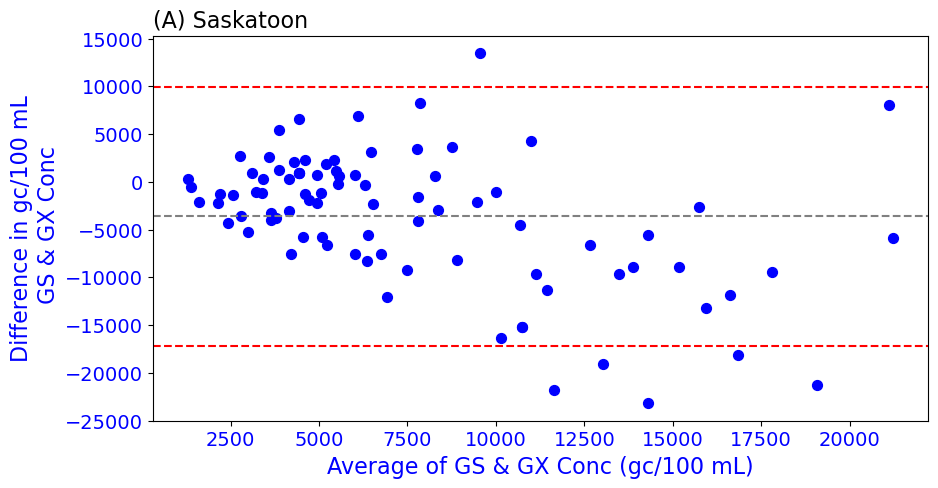

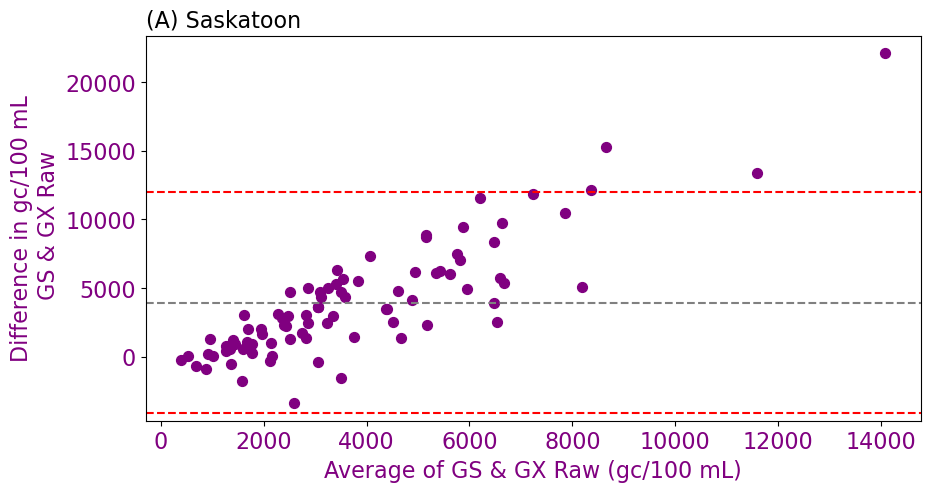

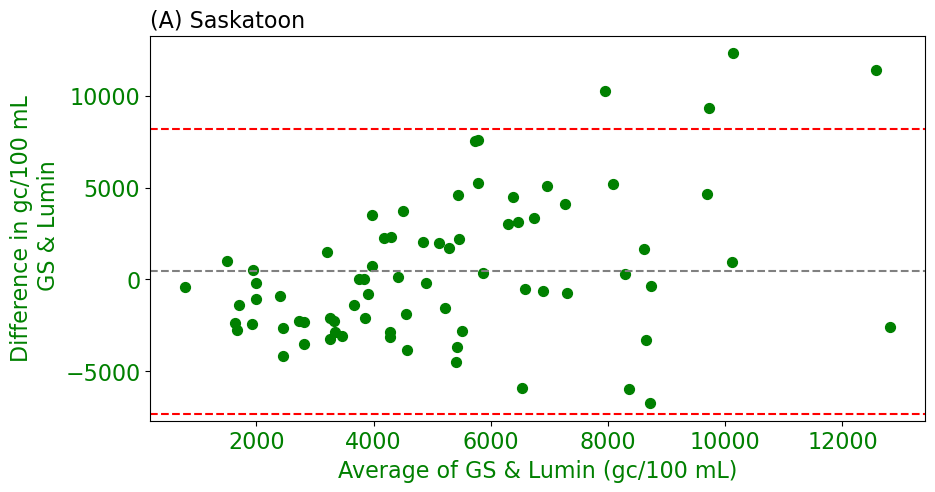

In [7]:
#####   Bland-Altman plot   ####
# Create first subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

diff_sk=sk_a['GS']-sk_a['GX Conc.']
mean_sk=(sk_a['GS']+sk_a['GX Conc.'])/2

ax1.scatter(mean_sk,diff_sk, s=50, color='blue')


mean_diff_sk = np.mean(diff_sk)
sd_diff_sk = np.std(diff_sk, axis=0)
loa = mean_diff_sk + 1.96 * sd_diff_sk, mean_diff_sk - 1.96 * sd_diff_sk
ax1.axhline(y=mean_diff_sk, color='gray', linestyle='--')
ax1.axhline(y=loa[0], color='red', linestyle='--')
ax1.axhline(y=loa[1], color='red', linestyle='--')

ax1.set_ylabel('Difference in gc/100 mL\n GS & GX Conc',fontsize=16,color="blue")
ax1.set_xlabel('Average of GS & GX Conc (gc/100 mL)',fontsize=16,color="blue")

ax1.tick_params(axis='x', labelsize=14,labelcolor="blue")
ax1.tick_params(axis='y', labelsize=14,labelcolor="blue")

ax1.set_title('(A) Saskatoon',fontsize=16, loc='left')

print(f"SASKATOON GX CONC: the value of mean_diff_sk is {mean_diff_sk}")
print(f"SASKATOON GX CONC: the value of Limit of Agreements are {loa[0]} and {loa[1]}")

#######################################################
fig, ax2 = plt.subplots(figsize=(10, 5))

diff_sk=sk_a['GS']-sk_a['GX Raw']
mean_sk=(sk_a['GS']+sk_a['GX Raw'])/2

ax2.scatter(mean_sk,diff_sk, s=50, color='purple')


mean_diff_sk = np.mean(diff_sk)
sd_diff_sk = np.std(diff_sk, axis=0)
loa = mean_diff_sk + 1.96 * sd_diff_sk, mean_diff_sk - 1.96 * sd_diff_sk
ax2.axhline(y=mean_diff_sk, color='gray', linestyle='--')
ax2.axhline(y=loa[0], color='red', linestyle='--')
ax2.axhline(y=loa[1], color='red', linestyle='--')

ax2.set_ylabel('Difference in gc/100 mL\n GS & GX Raw',fontsize=16, color="purple")
ax2.set_xlabel('Average of GS & GX Raw (gc/100 mL)',fontsize=16, color="purple")

ax2.tick_params(axis='x', labelsize=16, labelcolor="purple")
ax2.tick_params(axis='y', labelsize=16, labelcolor="purple")

ax2.set_title('(A) Saskatoon',fontsize=16, loc='left')

print(f"SASKATOON GX RAW: the value of mean_diff_sk is {mean_diff_sk}")
print(f"SASKATOON GX RAW: the value of Limit of Agreements are {loa[0]} and {loa[1]}")
#############################################################
#######################################################
fig, ax3 = plt.subplots(figsize=(10, 5))

diff_sk=sk_a['GS']-sk_a['Lumin.']
mean_sk=(sk_a['GS']+sk_a['Lumin.'])/2

ax3.scatter(mean_sk,diff_sk, s=50, color='green')


mean_diff_sk = np.mean(diff_sk)
sd_diff_sk = np.std(diff_sk, axis=0)
loa = mean_diff_sk + 1.96 * sd_diff_sk, mean_diff_sk - 1.96 * sd_diff_sk
ax3.axhline(y=mean_diff_sk, color='gray', linestyle='--')
ax3.axhline(y=loa[0], color='red', linestyle='--')
ax3.axhline(y=loa[1], color='red', linestyle='--')

ax3.set_ylabel('Difference in gc/100 mL\n GS & Lumin',fontsize=16, color="green")
ax3.set_xlabel('Average of GS & Lumin (gc/100 mL)',fontsize=16, color="green")

ax3.tick_params(axis='x', labelsize=16, labelcolor="green")
ax3.tick_params(axis='y', labelsize=16, labelcolor="green")

ax3.set_title('(A) Saskatoon',fontsize=16, loc='left')

print(f"SASKATOON lUMIN: the value of mean_diff_sk is {mean_diff_sk}")
print(f"SASKATOON lUMIN: the value of Limit of Agreements are {loa[0]} and {loa[1]}")

### 3.2) Bland-Altman Prince Albert


PA GX Conc: the value of mean_diff_pa is -4109.416675823724
PA GX Conc: the value of Limit of Agreements are 6803.655060418367 and -15022.488412065815
PA GX Raw: the value of mean_diff_pa is 2248.045127213177
PA GX Raw: the value of Limit of Agreements are 7763.185561047162 and -3267.0953066208085
PA Lumin: the value of mean_diff_pa is -2390.895092628893
PA Lumin: the value of Limit of Agreements are 6025.320310366766 and -10807.11049562455


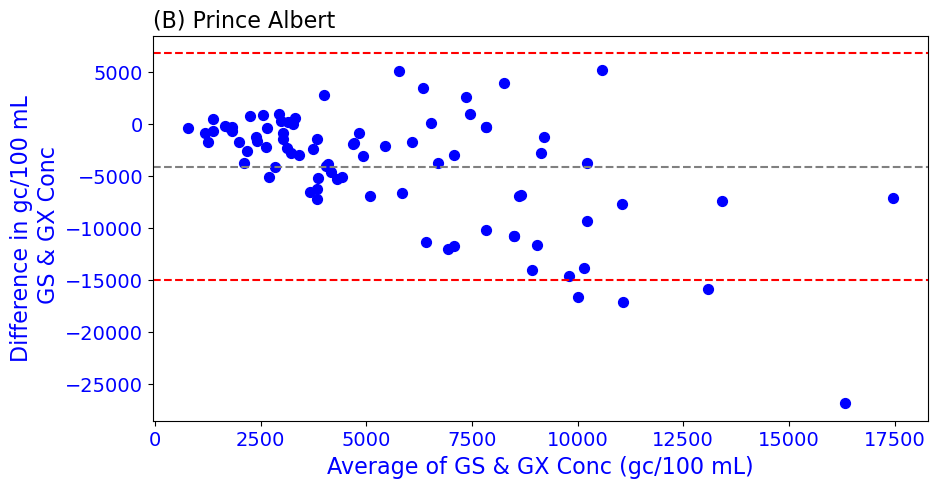

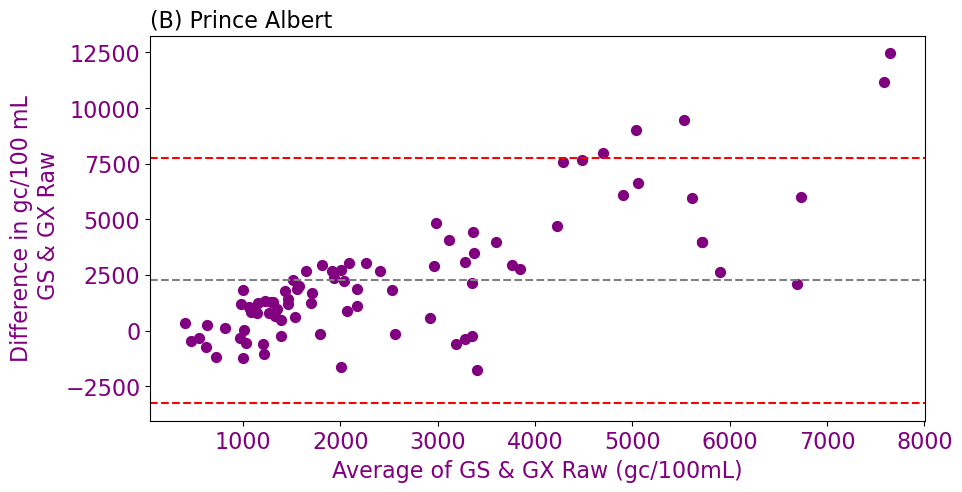

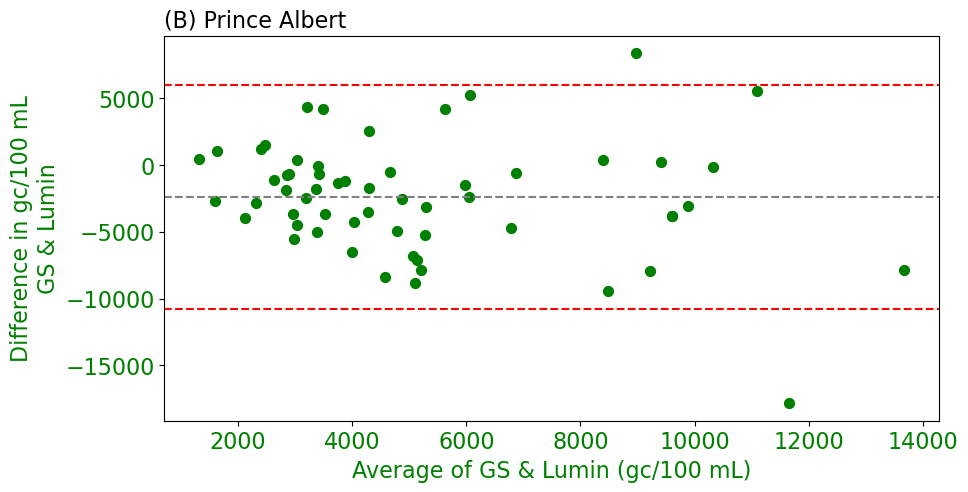

In [8]:
#####   Bland-Altman plot PA   ####
# Create first subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

diff_pa=pa_a['GS']-pa_a['GX Conc.']
mean_pa=(pa_a['GS']+pa_a['GX Conc.'])/2

ax1.scatter(mean_pa,diff_pa, s=50, color='blue')


mean_diff_pa = np.mean(diff_pa)
sd_diff_pa = np.std(diff_pa, axis=0)
loa = mean_diff_pa + 1.96 * sd_diff_pa, mean_diff_pa - 1.96 * sd_diff_pa
ax1.axhline(y=mean_diff_pa, color='gray', linestyle='--')
ax1.axhline(y=loa[0], color='red', linestyle='--')
ax1.axhline(y=loa[1], color='red', linestyle='--')

ax1.set_ylabel('Difference in gc/100 mL\n GS & GX Conc',fontsize=16,color="blue")
ax1.set_xlabel('Average of GS & GX Conc (gc/100 mL)',fontsize=16,color="blue")

ax1.tick_params(axis='x', labelsize=14,labelcolor="blue")
ax1.tick_params(axis='y', labelsize=14,labelcolor="blue")

ax1.set_title('(B) Prince Albert',fontsize=16, loc='left')

print(f"PA GX Conc: the value of mean_diff_pa is {mean_diff_pa}")
print(f"PA GX Conc: the value of Limit of Agreements are {loa[0]} and {loa[1]}")
#######################################################
fig, ax2 = plt.subplots(figsize=(10, 5))

diff_pa=pa_a['GS']-pa_a['GX Raw']
mean_pa=(pa_a['GS']+pa_a['GX Raw'])/2

ax2.scatter(mean_pa,diff_pa, s=50, color='purple')


mean_diff_pa = np.mean(diff_pa)
sd_diff_pa = np.std(diff_pa, axis=0)
loa = mean_diff_pa + 1.96 * sd_diff_pa, mean_diff_pa - 1.96 * sd_diff_pa
ax2.axhline(y=mean_diff_pa, color='gray', linestyle='--')
ax2.axhline(y=loa[0], color='red', linestyle='--')
ax2.axhline(y=loa[1], color='red', linestyle='--')

ax2.set_ylabel('Difference in gc/100 mL\n GS & GX Raw',fontsize=16, color="purple")
ax2.set_xlabel('Average of GS & GX Raw (gc/100mL)',fontsize=16, color="purple")

ax2.tick_params(axis='x', labelsize=16, labelcolor="purple")
ax2.tick_params(axis='y', labelsize=16, labelcolor="purple")

ax2.set_title('(B) Prince Albert',fontsize=16, loc='left')

print(f"PA GX Raw: the value of mean_diff_pa is {mean_diff_pa}")
print(f"PA GX Raw: the value of Limit of Agreements are {loa[0]} and {loa[1]}")
#############################################################
#######################################################
fig, ax3 = plt.subplots(figsize=(10, 5))

diff_pa=pa_a['GS']-pa_a['Lumin.']
mean_pa=(pa_a['GS']+pa_a['Lumin.'])/2

ax3.scatter(mean_pa,diff_pa, s=50, color='green')


mean_diff_pa = np.mean(diff_pa)
sd_diff_pa = np.std(diff_pa, axis=0)
loa = mean_diff_pa + 1.96 * sd_diff_pa, mean_diff_pa - 1.96 * sd_diff_pa
ax3.axhline(y=mean_diff_pa, color='gray', linestyle='--')
ax3.axhline(y=loa[0], color='red', linestyle='--')
ax3.axhline(y=loa[1], color='red', linestyle='--')

ax3.set_ylabel('Difference in gc/100 mL\n GS & Lumin ',fontsize=16, color="green")
ax3.set_xlabel('Average of GS & Lumin (gc/100 mL)',fontsize=16, color="green")

ax3.tick_params(axis='x', labelsize=16, labelcolor="green")
ax3.tick_params(axis='y', labelsize=16, labelcolor="green")

ax3.set_title('(B) Prince Albert',fontsize=16, loc='left')

print(f"PA Lumin: the value of mean_diff_pa is {mean_diff_pa}")
print(f"PA Lumin: the value of Limit of Agreements are {loa[0]} and {loa[1]}")

### 3.3) Bland-Altman North Battleford


NB GX Conc: the value of mean_diff_nb is -2135.374723945332
NB GX Conc: the value of Limit of Agreements are 7883.567623005241 and -12154.317070895904
NB GX Raw: the value of mean_diff_nb is 2608.8475383828254
NB GX Raw: the value of Limit of Agreements are 9877.021515190198 and -4659.326438424547
NB Lumin: the value of mean_diff_nb is -1061.966435820052
NB Lumin: the value of Limit of Agreements are 5260.410099833134 and -7384.342971473239


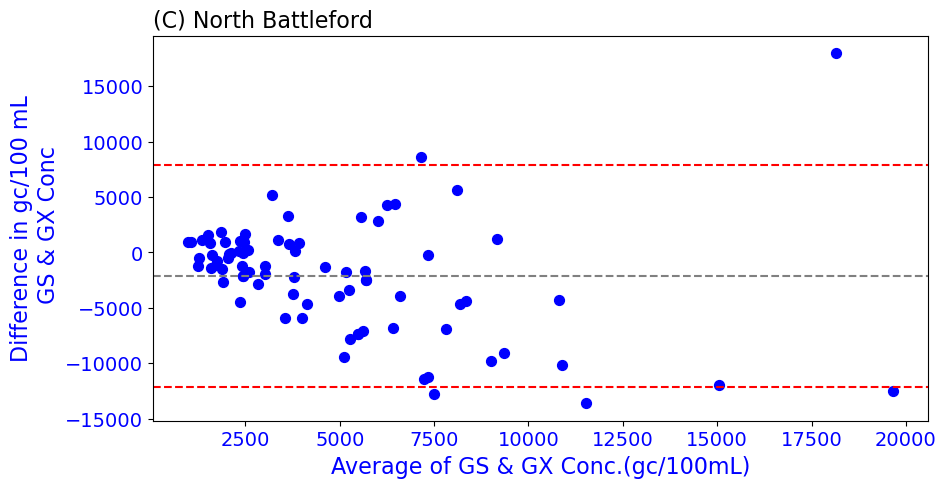

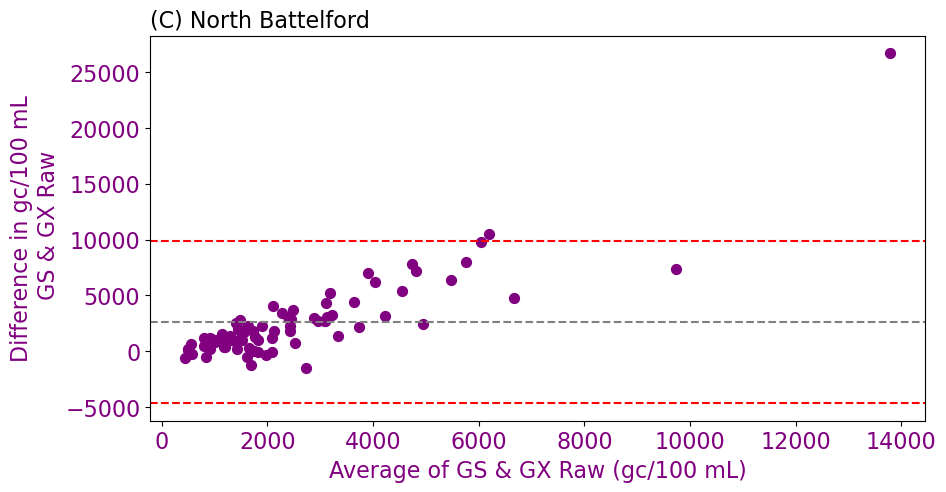

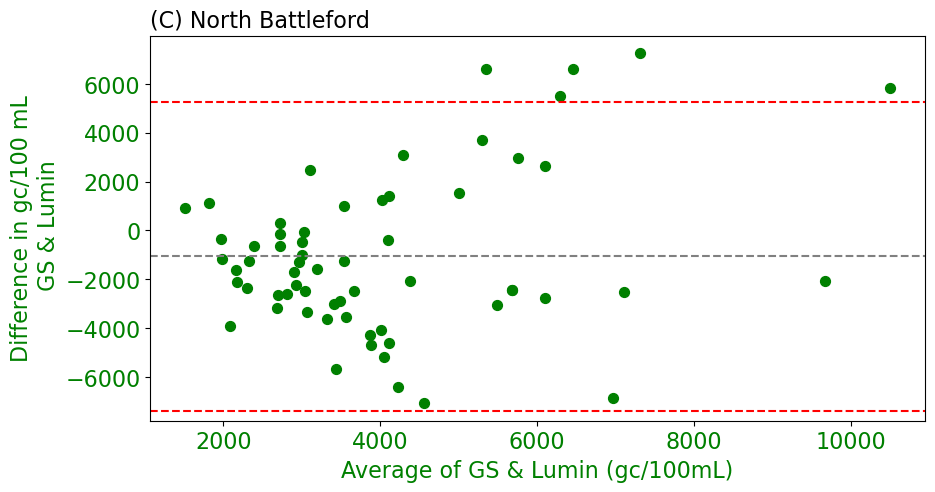

In [9]:
#####   Bland-Altman plot   ####
# Create first subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

diff_nb=nb_a['GS']-nb_a['GX Conc.']
mean_nb=(nb_a['GS']+nb_a['GX Conc.'])/2

ax1.scatter(mean_nb,diff_nb, s=50, color='blue')


mean_diff_nb = np.mean(diff_nb)
sd_diff_nb = np.std(diff_nb, axis=0)
loa = mean_diff_nb + 1.96 * sd_diff_nb, mean_diff_nb - 1.96 * sd_diff_nb
ax1.axhline(y=mean_diff_nb, color='gray', linestyle='--')
ax1.axhline(y=loa[0], color='red', linestyle='--')
ax1.axhline(y=loa[1], color='red', linestyle='--')

ax1.set_ylabel('Difference in gc/100 mL\n GS & GX Conc',fontsize=16,color="blue")
ax1.set_xlabel('Average of GS & GX Conc.(gc/100mL)',fontsize=16,color="blue")

ax1.tick_params(axis='x', labelsize=14,labelcolor="blue")
ax1.tick_params(axis='y', labelsize=14,labelcolor="blue")

ax1.set_title('(C) North Battleford',fontsize=16, loc='left')

print(f"NB GX Conc: the value of mean_diff_nb is {mean_diff_nb}")
print(f"NB GX Conc: the value of Limit of Agreements are {loa[0]} and {loa[1]}")
#######################################################
fig, ax2 = plt.subplots(figsize=(10, 5))

diff_nb=nb_a['GS']-nb_a['GX Raw']
mean_nb=(nb_a['GS']+nb_a['GX Raw'])/2

ax2.scatter(mean_nb,diff_nb, s=50, color='purple')


mean_diff_nb = np.mean(diff_nb)
sd_diff_nb = np.std(diff_nb, axis=0)
loa = mean_diff_nb + 1.96 * sd_diff_nb, mean_diff_nb - 1.96 * sd_diff_nb
ax2.axhline(y=mean_diff_nb, color='gray', linestyle='--')
ax2.axhline(y=loa[0], color='red', linestyle='--')
ax2.axhline(y=loa[1], color='red', linestyle='--')

ax2.set_ylabel('Difference in gc/100 mL\n GS & GX Raw',fontsize=16, color="purple")
ax2.set_xlabel('Average of GS & GX Raw (gc/100 mL)',fontsize=16, color="purple")

ax2.tick_params(axis='x', labelsize=16, labelcolor="purple")
ax2.tick_params(axis='y', labelsize=16, labelcolor="purple")

ax2.set_title('(C) North Battelford',fontsize=16, loc='left')

print(f"NB GX Raw: the value of mean_diff_nb is {mean_diff_nb}")
print(f"NB GX Raw: the value of Limit of Agreements are {loa[0]} and {loa[1]}")
#############################################################
#######################################################
fig, ax3 = plt.subplots(figsize=(10, 5))

diff_nb=nb_a['GS']-nb_a['Lumin.']
mean_nb=(nb_a['GS']+nb_a['Lumin.'])/2

ax3.scatter(mean_nb,diff_nb, s=50, color='green')


mean_diff_nb = np.mean(diff_nb)
sd_diff_nb = np.std(diff_nb, axis=0)
loa = mean_diff_nb + 1.96 * sd_diff_nb, mean_diff_nb - 1.96 * sd_diff_nb
ax3.axhline(y=mean_diff_nb, color='gray', linestyle='--')
ax3.axhline(y=loa[0], color='red', linestyle='--')
ax3.axhline(y=loa[1], color='red', linestyle='--')

ax3.set_ylabel('Difference in gc/100 mL\n GS & Lumin',fontsize=16, color="green")
ax3.set_xlabel('Average of GS & Lumin (gc/100mL)',fontsize=16, color="green")

ax3.tick_params(axis='x', labelsize=16, labelcolor="green")
ax3.tick_params(axis='y', labelsize=16, labelcolor="green")

ax3.set_title('(C) North Battleford',fontsize=16, loc='left')

print(f"NB Lumin: the value of mean_diff_nb is {mean_diff_nb}")
print(f"NB Lumin: the value of Limit of Agreements are {loa[0]} and {loa[1]}")

# Saskatoon

There are no NaN values in the dataframe.


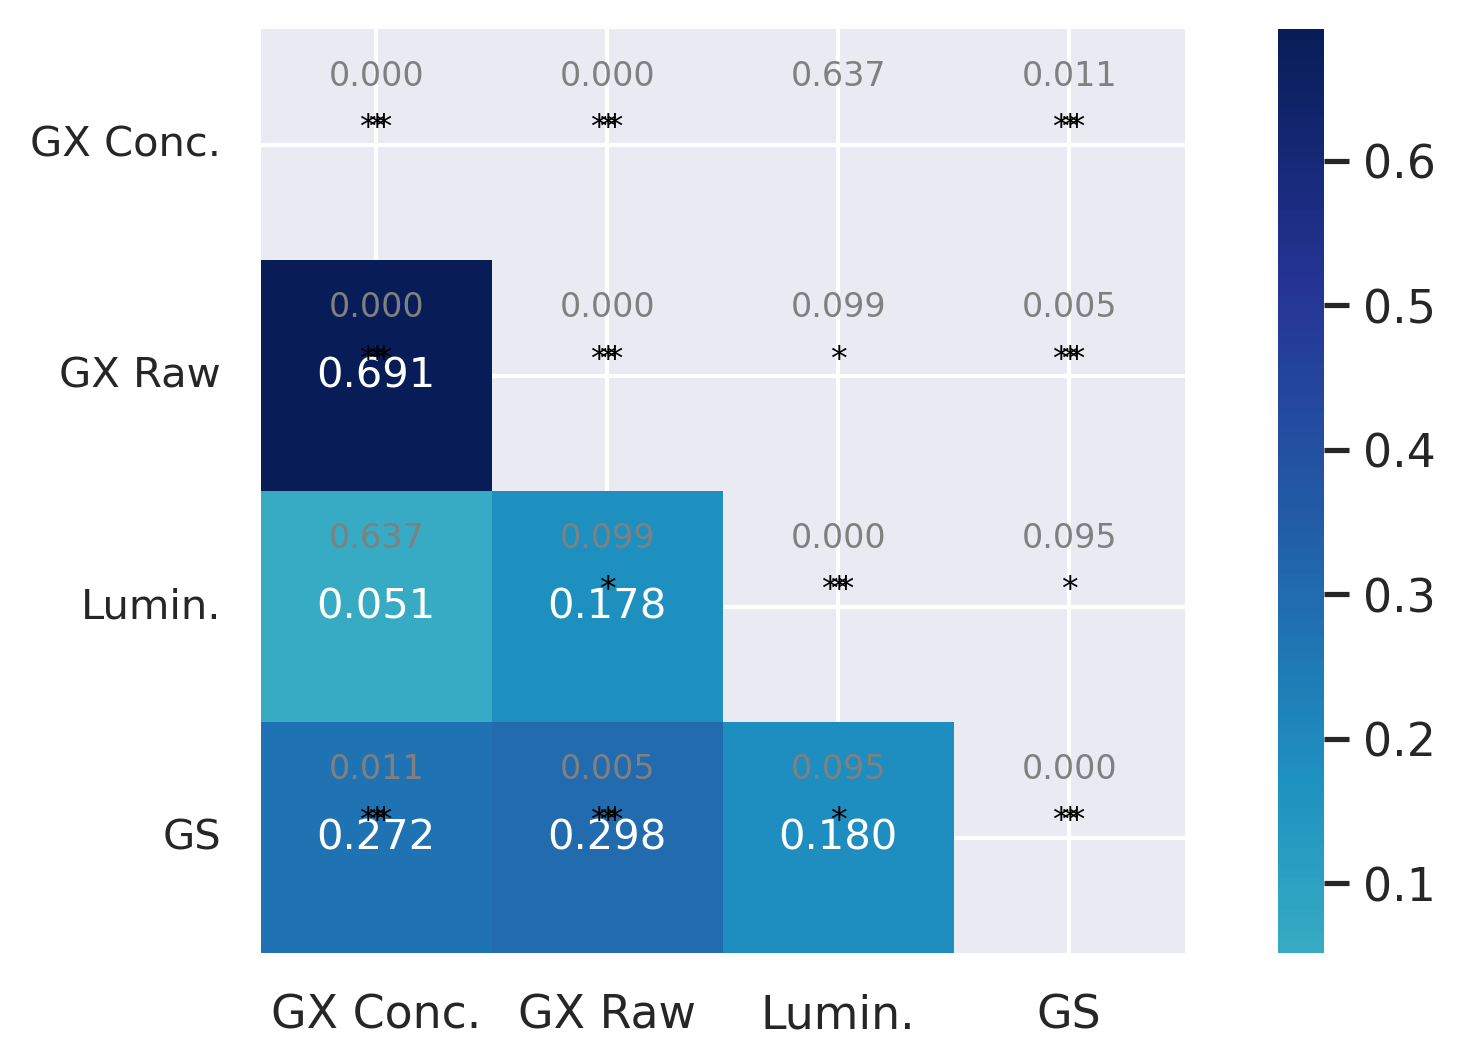

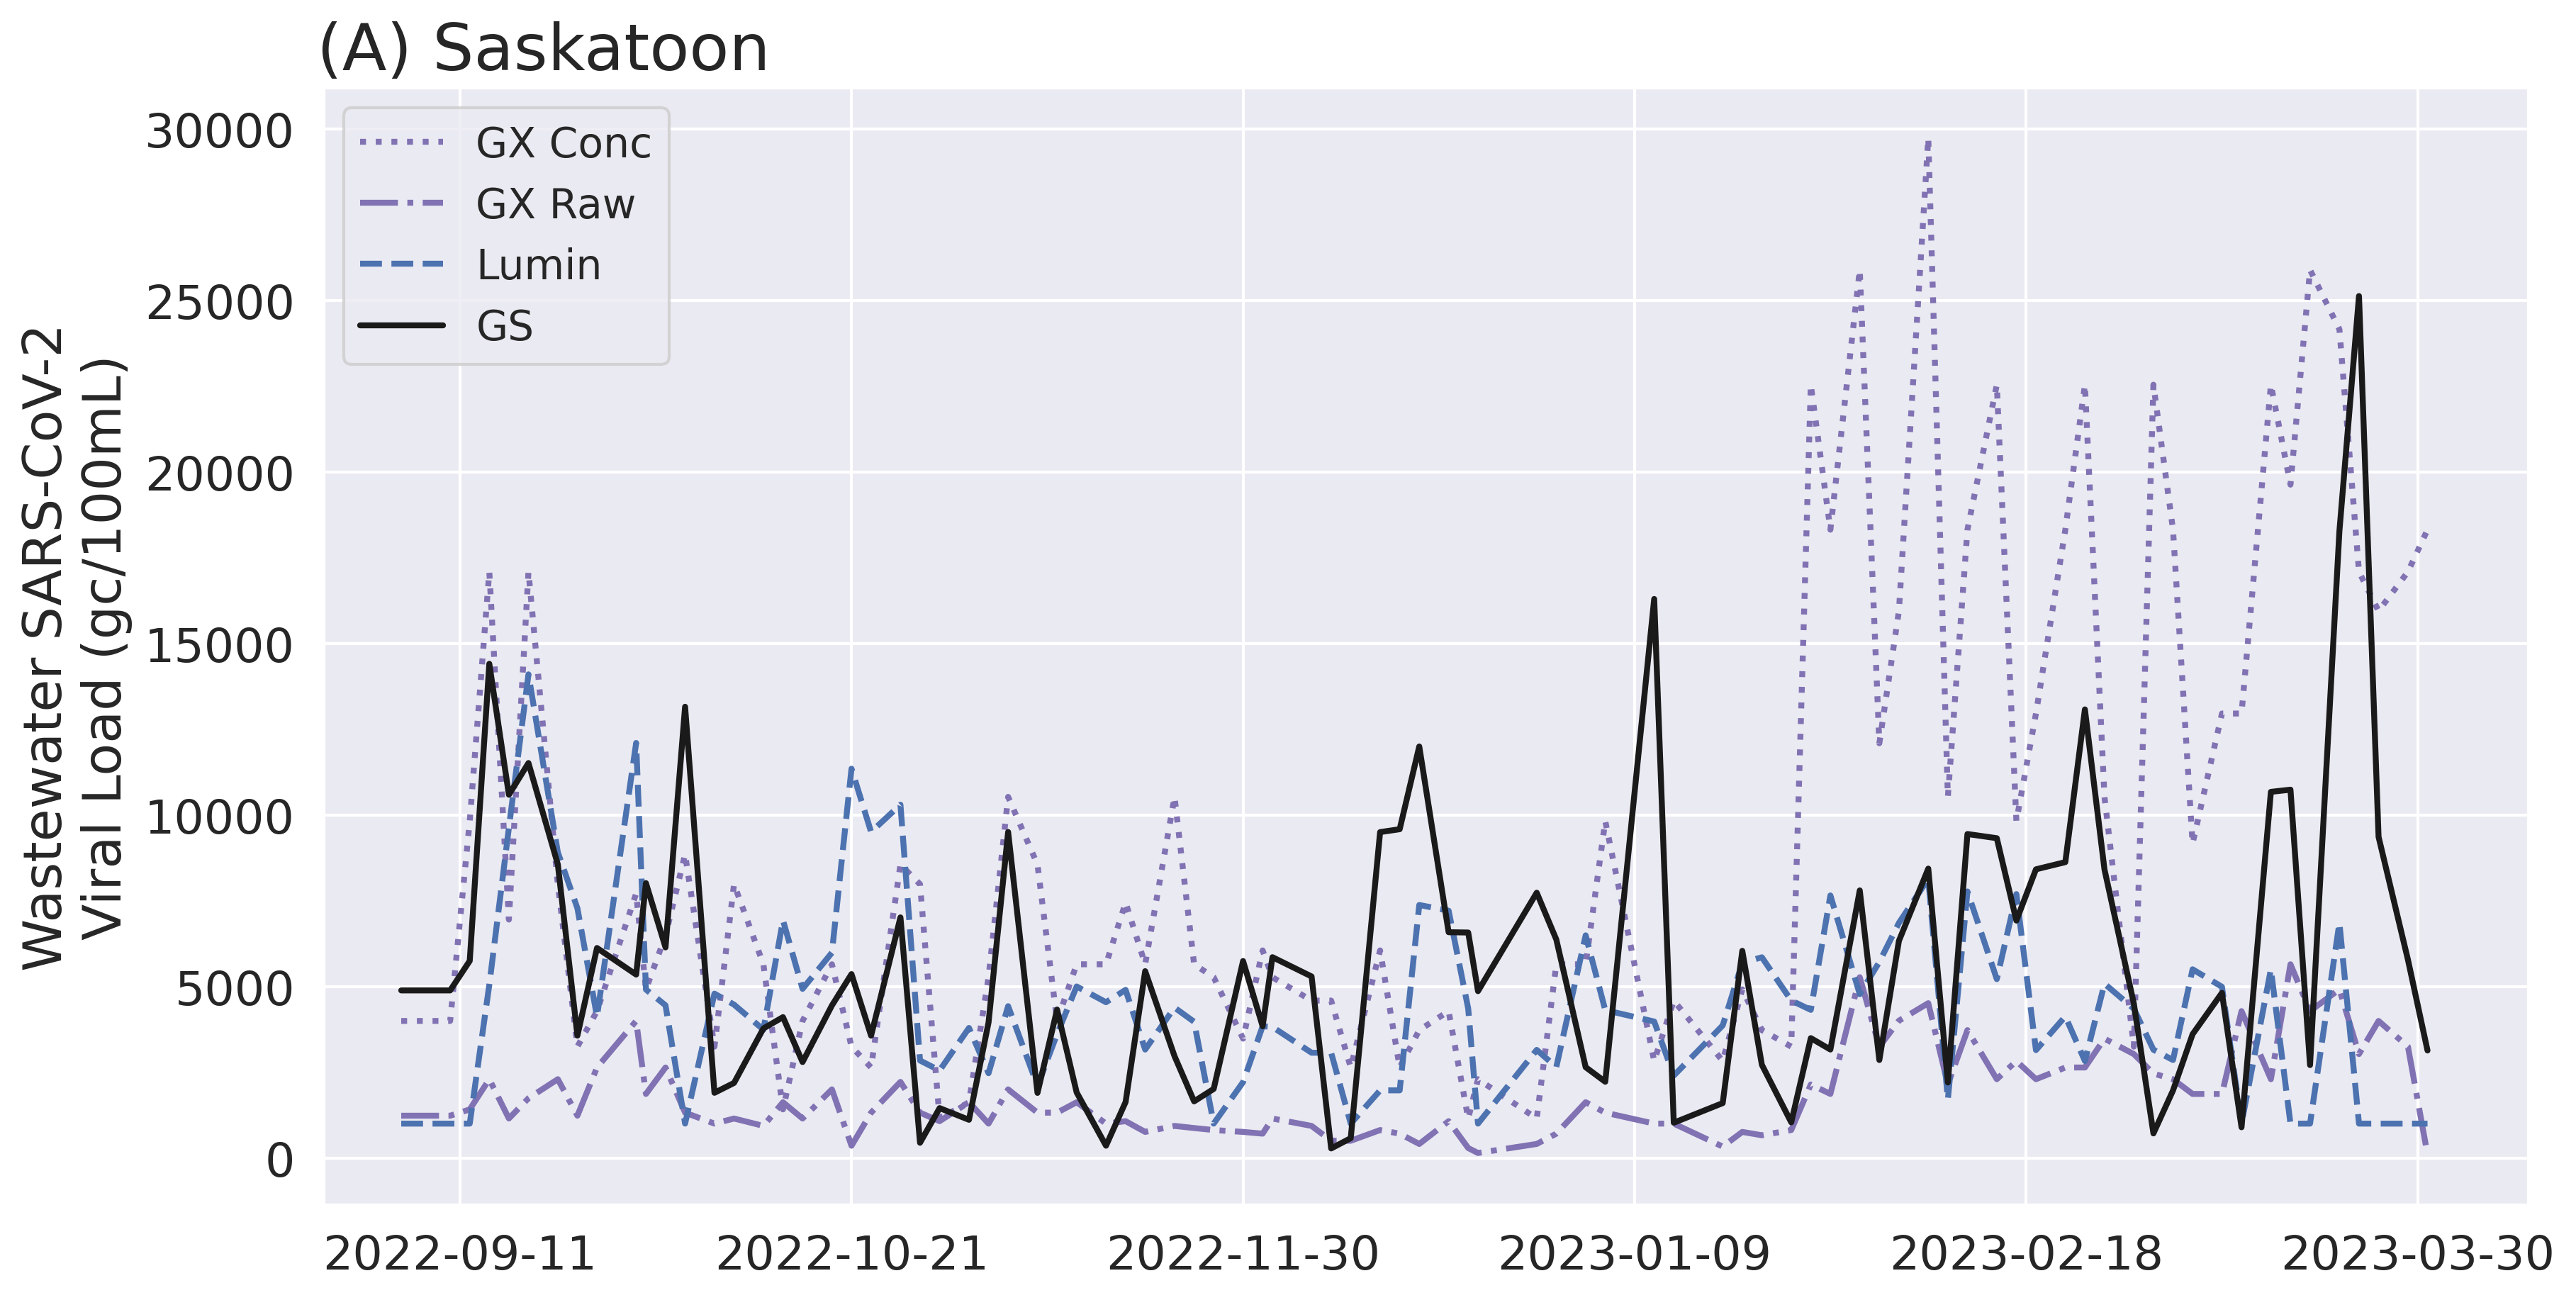

In [24]:

#####  Correlation Anlysis for all #####
cor_covid, pvalue_covid=spearmanr(sk_a.drop(['Date'],axis=1), nan_policy='omit')
sk1= sk_a.drop(['Date'],axis=1)

        # create dataframe with correlation & p-value matrixes
corr_df_all = pd.DataFrame(cor_covid, columns=sk1.columns, index=sk1.columns)
pval_df_all = pd.DataFrame(pvalue_covid, columns=sk1.columns, index=sk1.columns)

### I saw that the PLUS and regular kit results were not statistically associated with the gold-standard 
### results. But I saw when I consider all data, there are significant correlations. 
### So, I used all data

################   H E A T M A P  ###################
sb.set(font_scale=1.0)  # adjust font size

# create heatmap of correlation matrix with p-values
fig, ax = plt.subplots(figsize=(8,4),dpi=300)
fig.patch.set_facecolor('white')  # set the figure background color to white

sb.heatmap(corr_df_all, cmap='YlGnBu', center=0, annot=True, fmt='.3f',
            square=True, cbar=True, ax=ax, annot_kws={'size':10},
            mask=np.triu(np.ones_like(cor_covid, dtype=bool))) # mask to show only lower triangle
yticklabels = ['GX Conc.', 'GX Raw', 'Lumin.', 'GS']
ax.set_yticklabels(yticklabels, rotation=0, fontsize=10)

# add p-values to the heatmap annotations
for i in range(corr_df_all.shape[0]):
    for j in range(corr_df_all.shape[1]):
        if pval_df_all.iloc[i,j] < 0.1:  # add asterisks for p-values < 0.05
            ax.text(j+0.5, i+0.5, '*', ha='center', va='bottom', color='black', fontsize=8)
        if pval_df_all.iloc[i,j] < 0.05:  # add double asterisks for p-values < 0.01
            ax.text(j+0.5, i+0.5, '**', ha='center', va='bottom', color='black', fontsize=8)
        ax.text(j+0.5, i+0.2, f'{pval_df_all.iloc[i,j]:.3f}', ha='center', va='center', color='grey', fontsize=8)

#### add colorbar legend
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.title('Saskatoon')
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

plt.show()



#########################   DATA VISUALIZATOINs   ######################


### NaN repalcing with Lumin. LOD = 1000
sk_a['Lumin.'] = sk_a['Lumin.'].fillna(1000)
sk_a = sk_a.dropna()

# check if there are any NaN values in the dataframe
if sk_a.isna().any().any():
    print('There are NaN values in the dataframe.')
else:
    print('There are no NaN values in the dataframe.')
    

    # Convert the Date column to a numerical format
num_dates = np.array([dt.datetime.toordinal(date) for date in sk_a['Date']])

# Create a lowess smoother for Avg_L
lowess_smoother_R = sm.nonparametric.lowess(sk_a['GX Conc.'], num_dates, frac=0.00)
lowess_smoother_W = sm.nonparametric.lowess(sk_a['GX Raw'], num_dates, frac=0.00)
lowess_smoother_L = sm.nonparametric.lowess(sk_a['Lumin.'], num_dates, frac=0.00)
lowess_smoother_N2 = sm.nonparametric.lowess(sk_a['GS'], num_dates, frac=0.00)


# Plot the smoothed line on the same axes
fig, ax1 = plt.subplots(figsize=(12,6),dpi=300,constrained_layout=True)
fig.patch.set_facecolor('white')  # set the figure background color to white

ax1.plot(sk_a['Date'], lowess_smoother_R[:, 1], 'm:', linewidth=2)
ax1.plot(sk_a['Date'], lowess_smoother_W[:, 1], 'm-.', linewidth=2)
ax1.plot(sk_a['Date'], lowess_smoother_L[:, 1], 'b--', linewidth=2)
ax1.plot(sk_a['Date'], lowess_smoother_N2[:, 1], 'k-', linewidth=2)
ax1.set_ylabel('Wastewater SARS-CoV-2\nViral Load (gc/100mL)',fontsize=18)



ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(['GX Conc','GX Raw','Lumin','GS'],loc='best',fontsize=14)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=40))

# Get the initial tick date
initial_tick_date = pd.to_datetime('2022-09-4') - pd.DateOffset(days=7)

# Set the initial tick date as the start point
ax1.set_xlim(initial_tick_date, )

# Vertical lines for SARS-CoV-2 sublinages

#vertical_line_date = dt.datetime.strptime('2022-11-13', '%Y-%m-%d')
#plt.axvline(x=vertical_line_date, color='red')


# Add text to the left panel
#plt.text(0.05, 0.9, 'BA5 and others', transform=ax1.transAxes, fontsize=19, va='top',color='red')
#plt.text(0.55, 0.9, 'R346T and others', transform=ax1.transAxes, fontsize=18, va='top',color='red')


#plt.tick_params(axis='x', labelrotation=90)

plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

title=plt.title('(A) Saskatoon',fontsize=22)
title.set_position([0.1, 0.98])

plt.show()



### Correlation test between viral loads in three citites

In [25]:
########    FLOWRATEs fro SK, PA, and  NB    #########
sk_flow=pd.read_excel(r"C:\Users\moa997\OneDrive - University of Saskatchewan\Kerry Work\GeneXpert\Flowrates\SK_PA_NB_FlowRate.xlsx",sheet_name="Saskatoon")
pa_flow=pd.read_excel(r"C:\Users\moa997\OneDrive - University of Saskatchewan\Kerry Work\GeneXpert\Flowrates\SK_PA_NB_FlowRate.xlsx",sheet_name="PrinceAlbert")
nb_flow=pd.read_excel(r"C:\Users\moa997\OneDrive - University of Saskatchewan\Kerry Work\GeneXpert\Flowrates\SK_PA_NB_FlowRate.xlsx",sheet_name="NorthBattleford")

# Merge the two DataFrames based on the 'Date' column

            ###### SK
merged_sk = pd.merge(sk_flow, sk_a, on='Date')

merged_sk['GX Conc.'] = (merged_sk['GX Conc.'] * merged_sk['MLD'])/(0.0246376)
merged_sk['GX Raw'] = (merged_sk['GX Raw'] * merged_sk['MLD'])/(0.0246376)
merged_sk['Lumin.'] = (merged_sk['Lumin.'] * merged_sk['MLD'])/(0.0246376)
merged_sk['GS'] = (merged_sk['GS'] * merged_sk['MLD'])/(0.0246376)


  ####### PA
merged_pa = pd.merge(pa_flow, pa_a, on='Date')

merged_pa['GX Conc.'] = (merged_pa['GX Conc.'] * merged_pa['MLD'])/(0.004513)
merged_pa['GX Raw'] = (merged_pa['GX Raw'] * merged_pa['MLD'])/(0.004513)
merged_pa['Lumin.'] = (merged_pa['Lumin.'] * merged_pa['MLD'])/(0.004513)
merged_pa['GS'] = (merged_pa['GS'] * merged_pa['MLD'])/(0.004513)


     ####### NB
merged_nb = pd.merge(nb_flow, nb_a, on='Date')

merged_nb['GX Conc.'] = (merged_nb['GX Conc.'] * merged_nb['MLD'])/(0.0023702)
merged_nb['GX Raw'] = (merged_nb['GX Raw'] * merged_nb['MLD'])/(0.0023702)
merged_nb['Lumin.'] = (merged_nb['Lumin.'] * merged_nb['MLD'])/(0.0023702)
merged_nb['GS'] = (merged_nb['GS'] * merged_nb['MLD'])/(0.0023702)




In [26]:
###  MERGE NB, PA, and SK based on the Date for the correlation test   ####
# Merge the DataFrames and specify suffixes for overlapping columns
merged = pd.merge(merged_sk, merged_pa, on="Date", how="inner", suffixes=('_sk', '_pa'))
merged = pd.merge(merged, merged_nb, on="Date", how="inner", suffixes=('_merged', '_nb'))



## Gold-Standard
correlation_GS, p_value_GS=spearmanr(merged.drop(['Date','MLD_sk','MLD_pa','MLD','GX Conc._sk','GX Raw_sk', 'Lumin._sk',
                                                 'GX Conc._pa','GX Raw_pa','Lumin._pa',
                                                 'GX Conc.','GX Raw','Lumin.'],axis=1), nan_policy='omit')

## GX Conc
correlation_GX_Conc, p_value_GX_Conc=spearmanr(merged.drop(['Date','MLD_sk','MLD_pa','MLD','GS_sk','GX Raw_sk', 'Lumin._sk',
                                                 'GS_pa','GX Raw_pa','Lumin._pa',
                                                 'GS','GX Raw','Lumin.'],axis=1), nan_policy='omit')

## GX Raw
correlation_GX_Raw, p_value_GX_Raw=spearmanr(merged.drop(['Date','MLD_sk','MLD_pa','MLD','GX Conc._sk','GS_sk', 'Lumin._sk',
                                                 'GX Conc._pa','GS_pa','Lumin._pa',
                                                 'GX Conc.','GS','Lumin.'],axis=1), nan_policy='omit')

## Lumin
correlation_Lumin, p_value_Lumin=spearmanr(merged.drop(['Date','MLD_sk','MLD_pa','MLD','GX Conc._sk','GX Raw_sk', 'GS_sk',
                                                 'GX Conc._pa','GX Raw_pa','GS_pa',
                                                 'GX Conc.','GX Raw','GS'],axis=1), nan_policy='omit')




In [27]:
### NaN repalcing with Lumin. LOD = 1000 & rolling_mean for filling NaN with above and below values

#####  SASKATOON   #######
sk_a['Lumin.'] = sk_a['Lumin.'].fillna(1000)

# Use rolling window to calculate the mean of the values above and below NaN values
rolling_mean = sk_a['GX Conc.'].rolling(window=3, min_periods=1, center=True).mean()
sk_a['GX Conc.']=sk_a['GX Conc.'].fillna(rolling_mean)

rolling_mean = sk_a['GX Raw'].rolling(window=3, min_periods=1, center=True).mean()
sk_a['GX Raw']=sk_a['GX Raw'].fillna(rolling_mean)

sk_a.dropna(subset=['GS'], inplace=True)


#####  Prince Albert   #######
pa_a['Lumin.'] = pa_a['Lumin.'].fillna(1000)

# Use rolling window to calculate the mean of the values above and below NaN values
rolling_mean = pa_a['GX Conc.'].rolling(window=3, min_periods=1, center=True).mean()
pa_a['GX Conc.']=pa_a['GX Conc.'].fillna(rolling_mean)

rolling_mean = pa_a['GX Raw'].rolling(window=3, min_periods=1, center=True).mean()
pa_a['GX Raw']=pa_a['GX Raw'].fillna(rolling_mean)

pa_a.dropna(subset=['GS'], inplace=True)


#### NORTH BATTLEFORD ######
nb_a['Lumin.'] = nb_a['Lumin.'].fillna(1000)

# Use rolling window to calculate the mean of the values above and below NaN values
rolling_mean = nb_a['GX Conc.'].rolling(window=3, min_periods=1, center=True).mean()
nb_a['GX Conc.']=nb_a['GX Conc.'].fillna(rolling_mean)

rolling_mean = nb_a['GX Raw'].rolling(window=3, min_periods=1, center=True).mean()
nb_a['GX Raw']=nb_a['GX Raw'].fillna(rolling_mean)

nb_a.dropna(subset=['GS'], inplace=True)


# Assuming your dataframe is named 'df'
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns



# PRINCE ALBERT

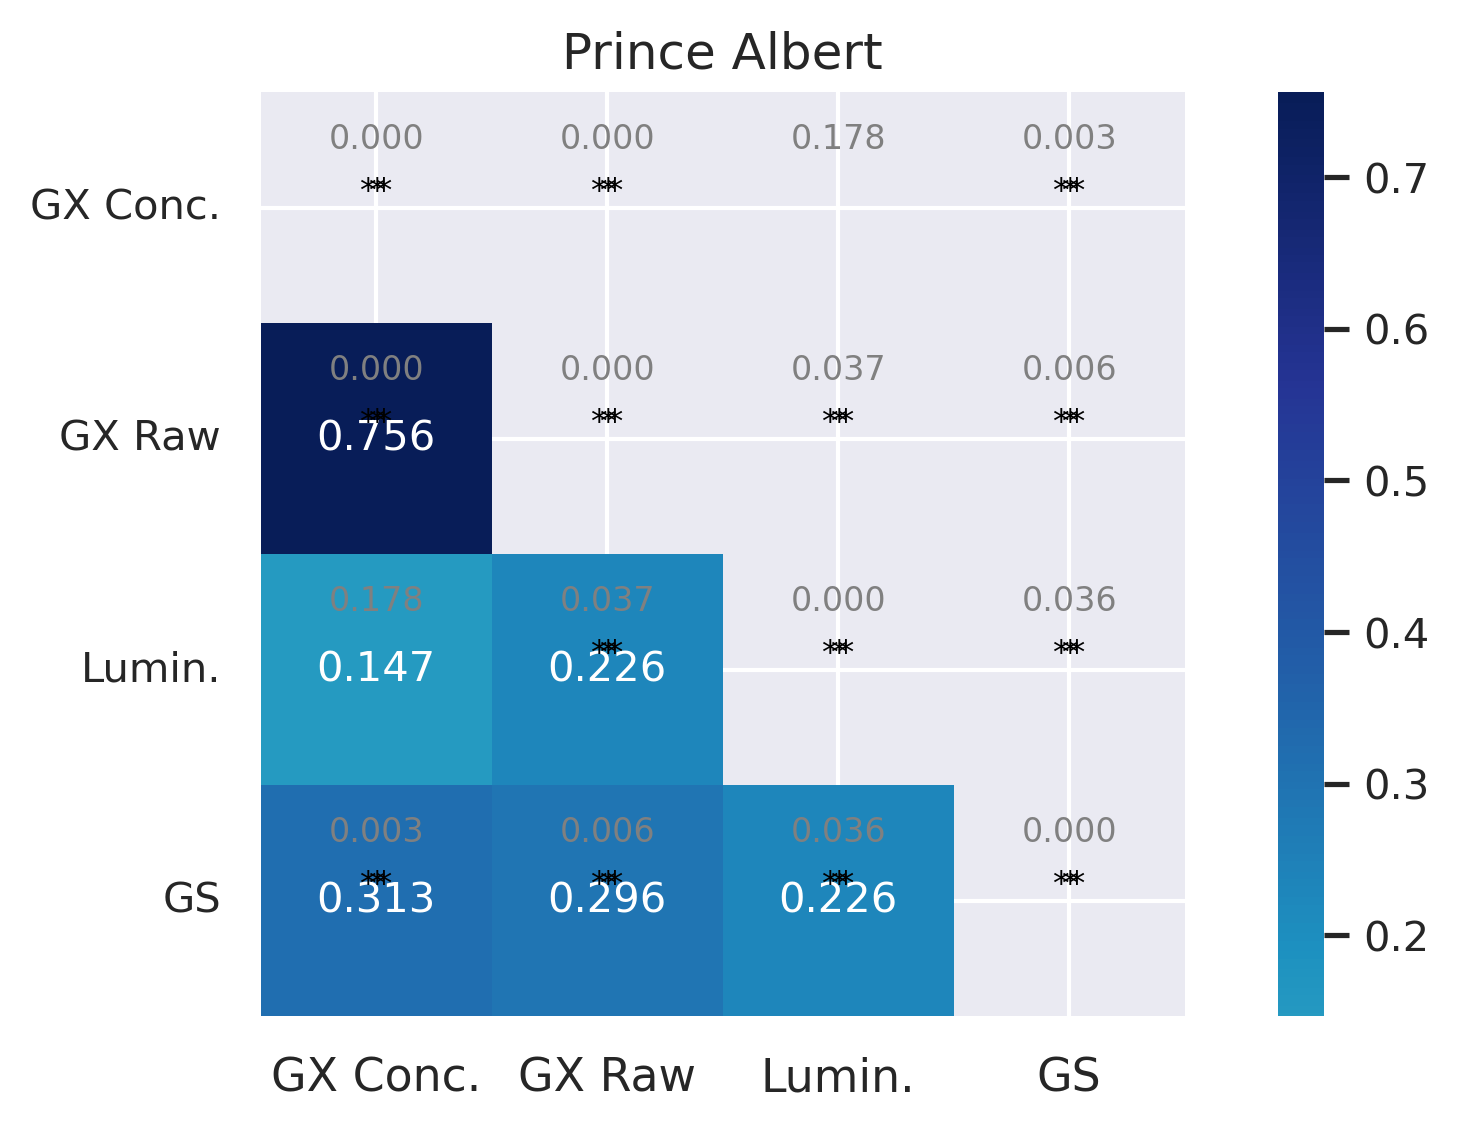

There are no NaN values in the dataframe.


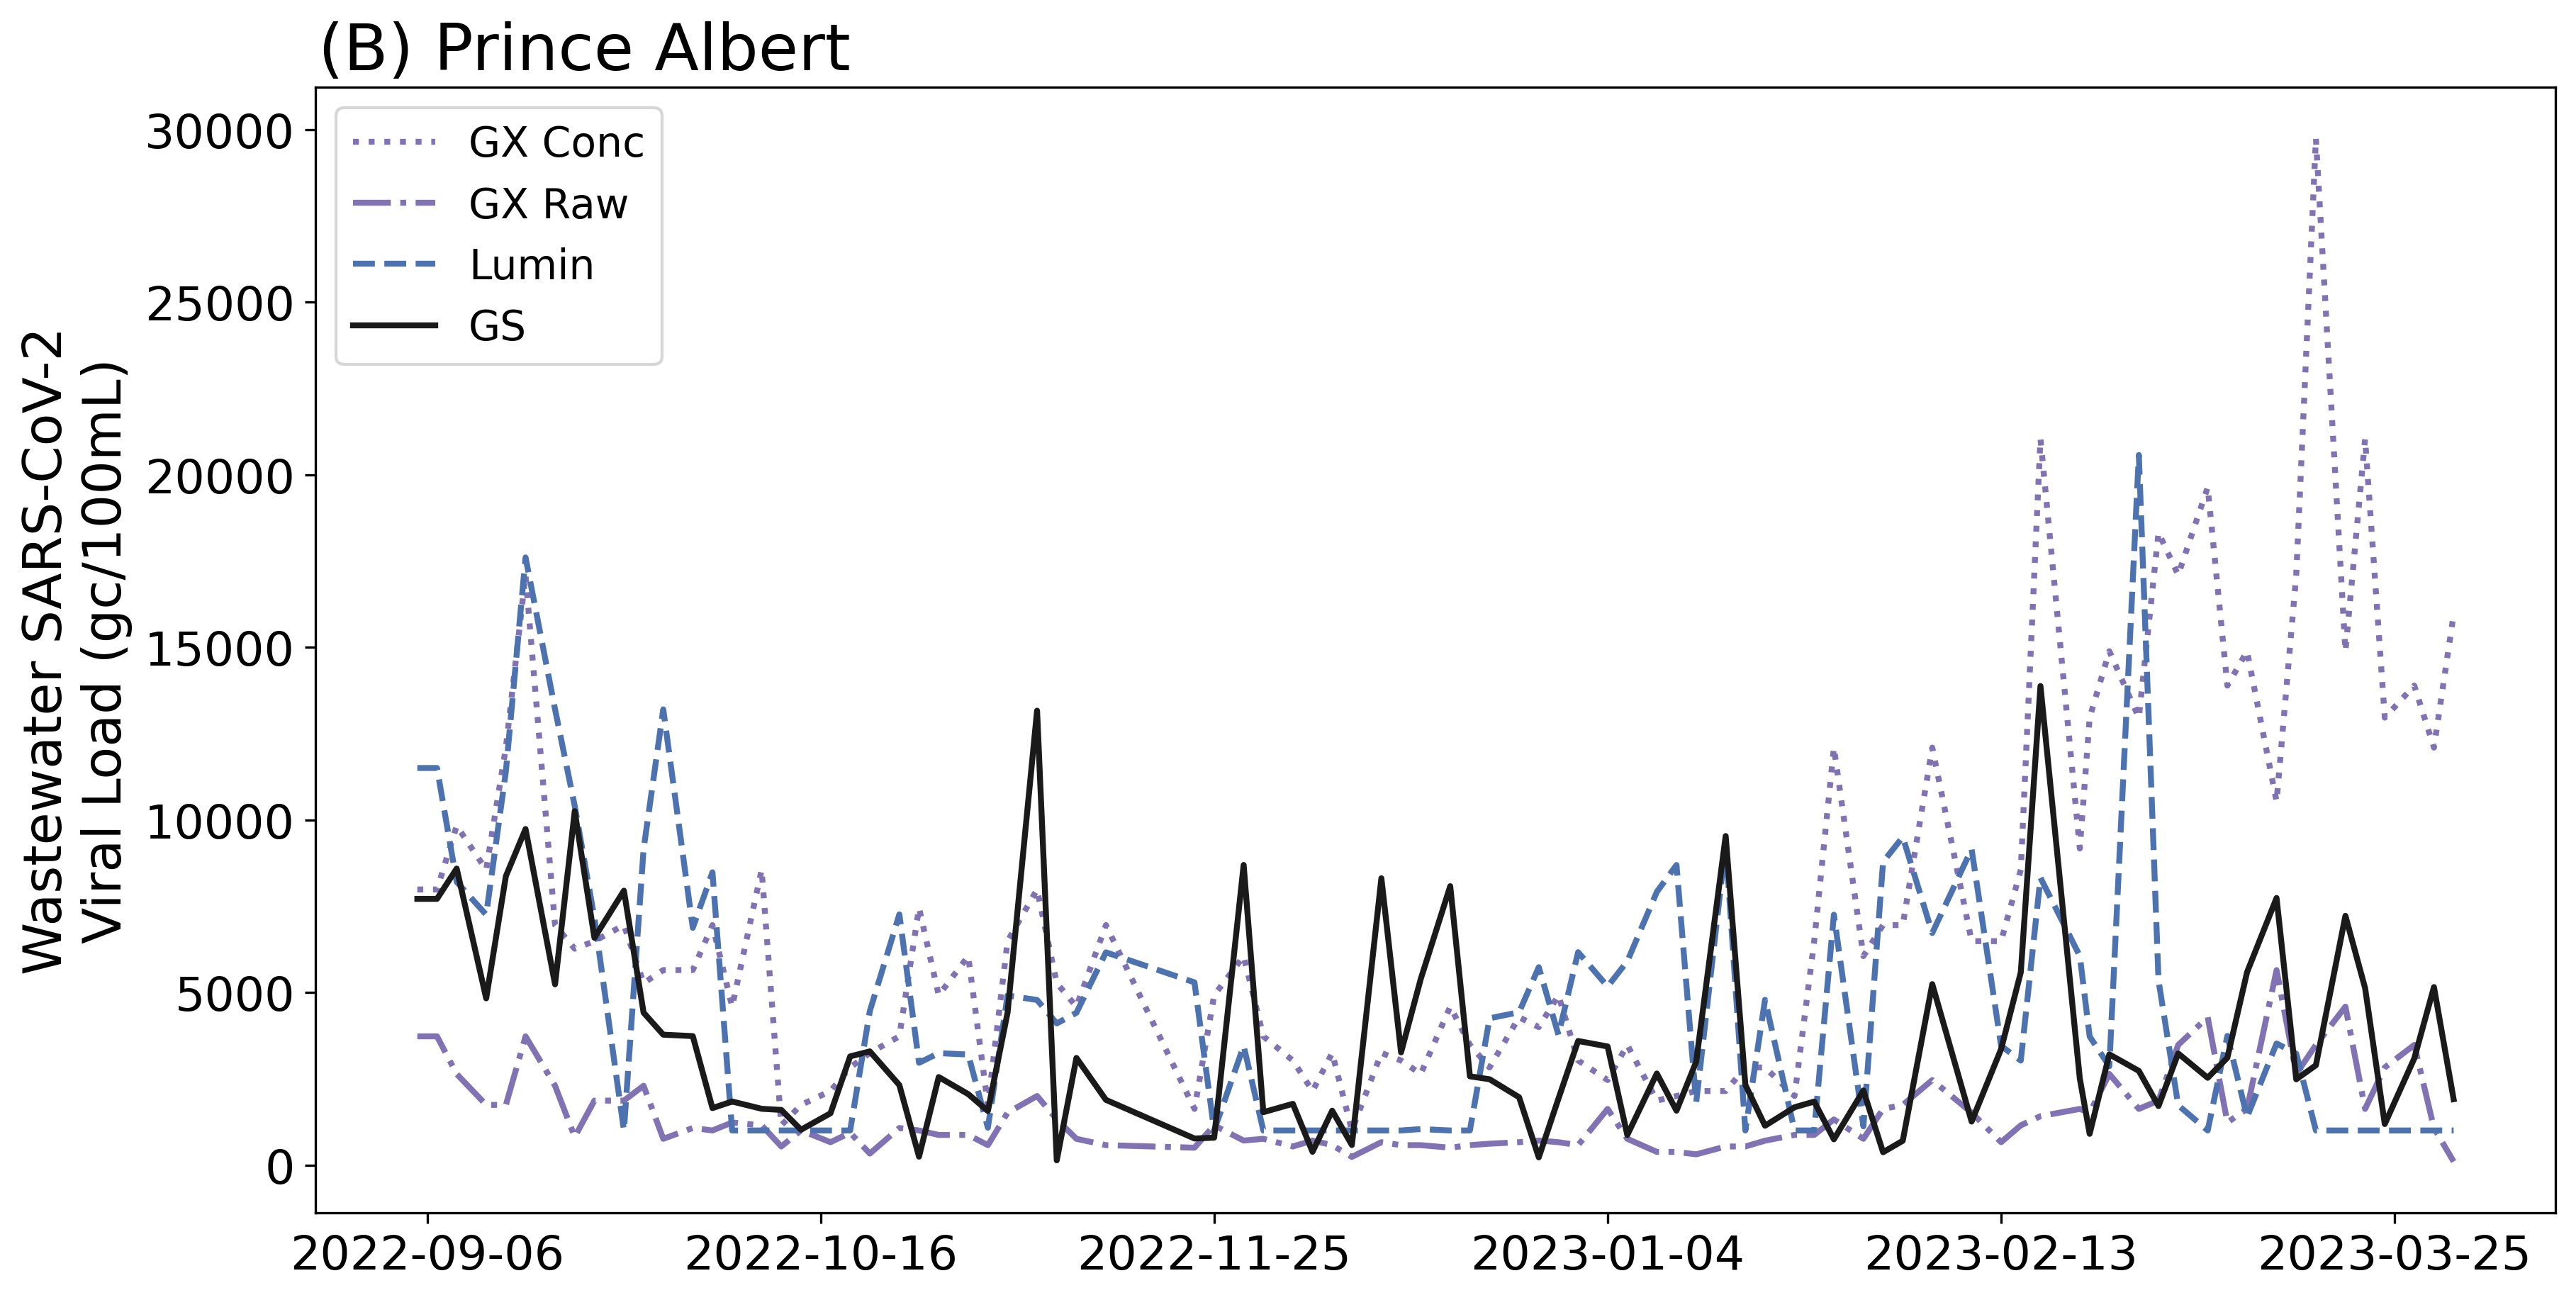

In [28]:
########      PRINCE ALBERT Before PLUS KIT and AFTER Plus KIT     #######
pa_PLUS = pa_a[pa_a['Date'] > pd.Timestamp('2023-01-18 00:00:00')].copy() #After PLUS
pa_reg = pa_a[pa_a['Date'] < pd.Timestamp('2023-01-18 00:00:00')].copy() #Before PLUS


#####  Correlation Anlysis for before #####
cor_covid, pvalue_covid=spearmanr(pa_reg.drop(['Date'],axis=1), nan_policy='omit')
sk1= pa_reg.drop(['Date'],axis=1)

        # create dataframe with correlation & p-value matrixes
corr_df_reg = pd.DataFrame(cor_covid, columns=sk1.columns, index=sk1.columns)
pval_df_reg = pd.DataFrame(pvalue_covid, columns=sk1.columns, index=sk1.columns)

#####  Correlation Anlysis for AFTER #####
cor_covid, pvalue_covid=spearmanr(pa_PLUS.drop(['Date'],axis=1), nan_policy='omit')
sk1= pa_PLUS.drop(['Date'],axis=1)

        # create dataframe with correlation & p-value matrixes
corr_df_PLUS = pd.DataFrame(cor_covid, columns=sk1.columns, index=sk1.columns)
pval_df_PLUS = pd.DataFrame(pvalue_covid, columns=sk1.columns, index=sk1.columns)

#####  Correlation Anlysis for all #####
cor_covid, pvalue_covid=spearmanr(pa_a.drop(['Date'],axis=1), nan_policy='omit')
sk1= pa_a.drop(['Date'],axis=1)

        # create dataframe with correlation & p-value matrixes
corr_df_all = pd.DataFrame(cor_covid, columns=sk1.columns, index=sk1.columns)
pval_df_all = pd.DataFrame(pvalue_covid, columns=sk1.columns, index=sk1.columns)

### I saw that the PLUS and regular kit results were not statistically associated with the gold-standard 
### results. But I saw when I consider all data, there are significant correlations. 
### So, I used all data

################   H E A T M A P  ###################
sb.set(font_scale=1.0)  # adjust font size

# create heatmap of correlation matrix with p-values
fig, ax = plt.subplots(figsize=(8,4),dpi=300)
fig.patch.set_facecolor('white')  # set the figure background color to white

sb.heatmap(corr_df_all, cmap='YlGnBu', center=0, annot=True, fmt='.3f',
            square=True, cbar=True, ax=ax, annot_kws={'size':10},
            mask=np.triu(np.ones_like(corr_df_all, dtype=bool))) # mask to show only lower triangle
yticklabels = ['GX Conc.', 'GX Raw', 'Lumin.', 'GS']
ax.set_yticklabels(yticklabels, rotation=0, fontsize=10)

# add p-values to the heatmap annotations
for i in range(corr_df_all.shape[0]):
    for j in range(corr_df_all.shape[1]):
        if pval_df_all.iloc[i,j] < 0.1:  # add asterisks for p-values < 0.05
            ax.text(j+0.5, i+0.5, '*', ha='center', va='bottom', color='black', fontsize=8)
        if pval_df_all.iloc[i,j] < 0.05:  # add double asterisks for p-values < 0.01
            ax.text(j+0.5, i+0.5, '**', ha='center', va='bottom', color='black', fontsize=8)
        ax.text(j+0.5, i+0.2, f'{pval_df_all.iloc[i,j]:.3f}', ha='center', va='center', color='grey', fontsize=8)

# add colorbar legend
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.title('Prince Albert')
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

plt.show()

#########################   DATA VISUALIZATOINs   ######################
### NaN repalcing with Lumin. LOD = 1000 & rolling_mean for filling NaN with above and below values
pa_a['Lumin.'] = pa_a['Lumin.'].fillna(1000)

# Use rolling window to calculate the mean of the values above and below NaN values
rolling_mean = pa_a['GX Conc.'].rolling(window=3, min_periods=1, center=True).mean()
pa_a['GX Conc.']=pa_a['GX Conc.'].fillna(rolling_mean)

rolling_mean = pa_a['GX Raw'].rolling(window=3, min_periods=1, center=True).mean()
pa_a['GX Raw']=pa_a['GX Raw'].fillna(rolling_mean)

pa_a.dropna(subset=['GS'], inplace=True)


# check if there are any NaN values in the dataframe
if sk_a.isna().any().any():
    print('There are NaN values in the dataframe.')
else:
    print('There are no NaN values in the dataframe.')
    

    # Convert the Date column to a numerical format
num_dates = np.array([dt.datetime.toordinal(date) for date in pa_a['Date']])

# Create a lowess smoother for Avg_L
lowess_smoother_R = sm.nonparametric.lowess(pa_a['GX Conc.'], num_dates, frac=0.00)
lowess_smoother_W = sm.nonparametric.lowess(pa_a['GX Raw'], num_dates, frac=0.00)
lowess_smoother_L = sm.nonparametric.lowess(pa_a['Lumin.'], num_dates, frac=0.00)
lowess_smoother_N2 = sm.nonparametric.lowess(pa_a['GS'], num_dates, frac=0.00)


# Plot the smoothed line on the same axes
fig, ax1 = plt.subplots(figsize=(12,6),dpi=300,constrained_layout=True)
fig.patch.set_facecolor('white')  # set the figure background color to white

ax1.plot(pa_a['Date'], lowess_smoother_R[:, 1], 'm:', linewidth=2)
ax1.plot(pa_a['Date'], lowess_smoother_W[:, 1], 'm-.', linewidth=2)
ax1.plot(pa_a['Date'], lowess_smoother_L[:, 1], 'b--', linewidth=2)
ax1.plot(pa_a['Date'], lowess_smoother_N2[:, 1], 'k-', linewidth=2)
ax1.set_ylabel('Wastewater SARS-CoV-2\nViral Load (gc/100mL)',fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(['GX Conc','GX Raw','Lumin','GS'],loc='best',fontsize=14)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=40))


# Vertical lines for SARS-CoV-2 sublinages

#vertical_line_date = dt.datetime.strptime('2022-11-13', '%Y-%m-%d')
#plt.axvline(x=vertical_line_date, color='red')


# Add text to the left panel
#plt.text(0.05, 0.9, 'BA5 and others', transform=ax1.transAxes, fontsize=19, va='top',color='red')
#plt.text(0.55, 0.9, 'R346T and others', transform=ax1.transAxes, fontsize=18, va='top',color='red')


#plt.tick_params(axis='x', labelrotation=90)

plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

title=plt.title('(B) Prince Albert',fontsize=22)
title.set_position([0.12, 1.20])

plt.show()

In [30]:
GS = pd.DataFrame(lowess_smoother_N2)
GS.rename(columns={0: 'Date', 1: 'Smoothed_N2'}, inplace=True)

GX_Conc = pd.DataFrame(lowess_smoother_R)
GX_Conc.rename(columns={0: 'Date', 1: 'GX_Conc'}, inplace=True)

GX_Raw = pd.DataFrame(lowess_smoother_W)
GX_Raw.rename(columns={0: 'Date', 1: 'GX_Raw'}, inplace=True)

Lumin = pd.DataFrame(lowess_smoother_L)
Lumin.rename(columns={0: 'Date', 1: 'Lumin'}, inplace=True)

# Define the row ranges
range1 = (0, 57)  # Rows 2 to 5 (inclusive)
range2 = (57, 81)  # Rows 5 to 8 (inclusive)

# Calculate the minimum and maximum values for the column within the specified ranges
min_range1 = GX_Conc['GX_Conc'].iloc[range1[0]:range1[1]+1].min()
max_range1 = GX_Conc['GX_Conc'].iloc[range1[0]:range1[1]+1].max()

min_range2 = GX_Conc['GX_Conc'].iloc[range2[0]:range2[1]+1].min()
max_range2 = GX_Conc['GX_Conc'].iloc[range2[0]:range2[1]+1].max()

# Print the results
print(f"Minimum value in range 1: {min_range1}")
print(f"Maximum value in range 1: {max_range1}")
print(f"Minimum value in range 2: {min_range2}")
print(f"Maximum value in range 2: {max_range2}")

# Calculate the minimum and maximum values for the column
min_GS = GS['Smoothed_N2'].min()
max_GS = GS['Smoothed_N2'].max()
print(f"Minimum value in GS PA: {min_GS}")
print(f"Maximum value in GS PA: {max_GS}")

min_Conc = GX_Conc['GX_Conc'].min()
max_Conc = GX_Conc['GX_Conc'].max()
print(f"Minimum value in GX_Conc PA: {min_Conc}")
print(f"Maximum value in GX_Conc PA: {max_Conc}")

min_Raw = GX_Raw['GX_Raw'].min()
max_Raw = GX_Raw['GX_Raw'].max()
print(f"Minimum value in GX_Raw PA: {min_Raw}")
print(f"Maximum value in GX_Raw PA: {max_Raw}")

min_Lumin = Lumin['Lumin'].min()
max_Lumin = Lumin['Lumin'].max()
print(f"Minimum value in Lumin PA: {min_Lumin}")
print(f"Maximum value in Lumin PA: {max_Lumin}")

Minimum value in range 1: 1000.2234319707284
Maximum value in range 1: 17092.633900180786
Minimum value in range 2: 1998.7500132561815
Maximum value in range 2: 29739.807625253576
Minimum value in GS PA: 134.0549451383639
Maximum value in GS PA: 13874.177175977306
Minimum value in GX_Conc PA: 1000.2234319707284
Maximum value in GX_Conc PA: 29739.807625253576
Minimum value in GX_Raw PA: 100.0
Maximum value in GX_Raw PA: 5646.127257441586
Minimum value in Lumin PA: 1000.0
Maximum value in Lumin PA: 20566.666666666664


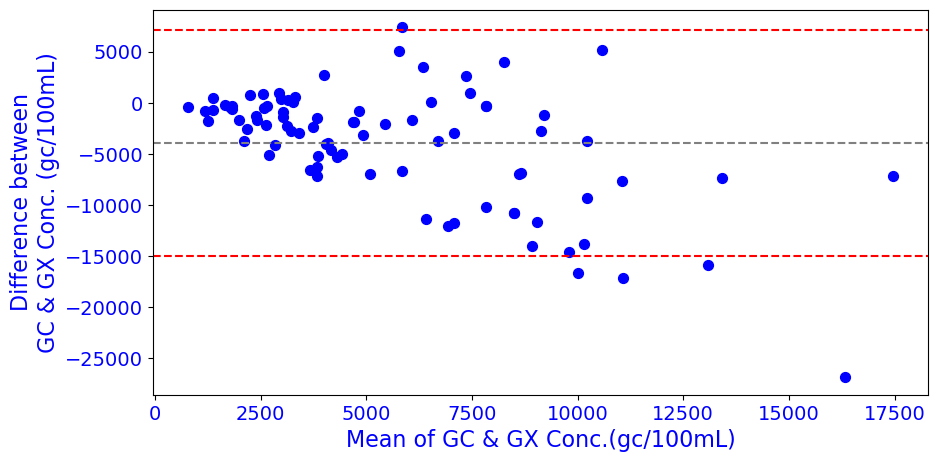

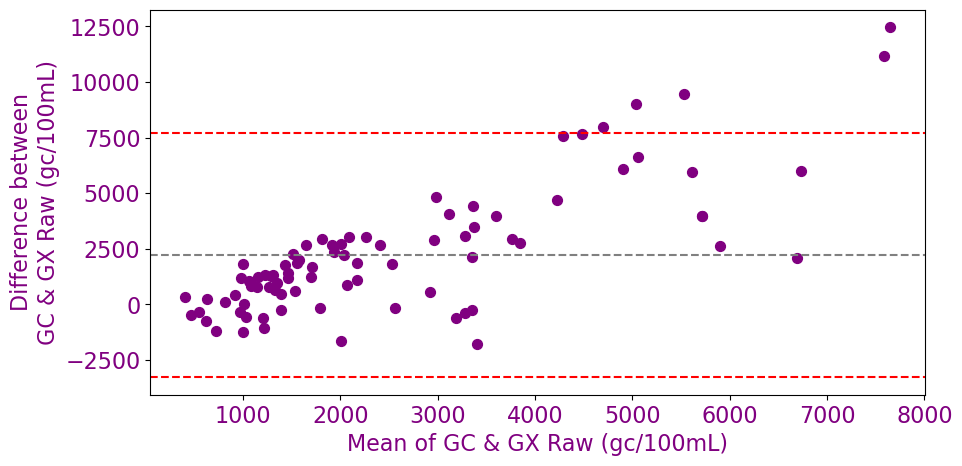

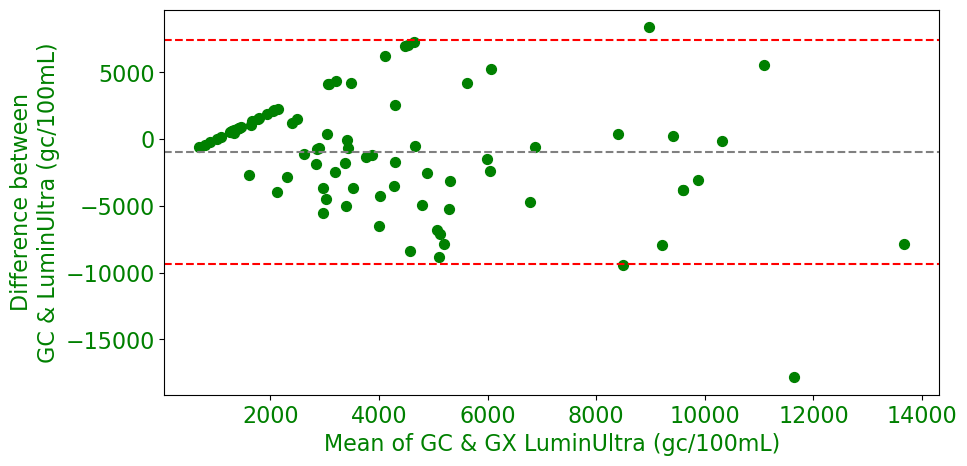

In [51]:
#####   Bland-Altman plot   ####
# Create first subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

diff_pa=pa_a['GS']-pa_a['GX Conc.']
mean_pa=(pa_a['GS']+pa_a['GX Conc.'])/2

ax1.scatter(mean_pa,diff_pa, s=50, color='blue')


mean_diff_pa = np.mean(diff_pa)
sd_diff_pa = np.std(diff_pa, axis=0)
loa = mean_diff_pa + 1.96 * sd_diff_pa, mean_diff_pa - 1.96 * sd_diff_pa
ax1.axhline(y=mean_diff_pa, color='gray', linestyle='--')
ax1.axhline(y=loa[0], color='red', linestyle='--')
ax1.axhline(y=loa[1], color='red', linestyle='--')

ax1.set_ylabel('Difference between\n GC & GX Conc. (gc/100mL) ',fontsize=16,color="blue")
ax1.set_xlabel('Mean of GC & GX Conc.(gc/100mL)',fontsize=16,color="blue")

ax1.tick_params(axis='x', labelsize=14,labelcolor="blue")
ax1.tick_params(axis='y', labelsize=14,labelcolor="blue")

ax1.set_title('',fontsize=20)

#######################################################
fig, ax2 = plt.subplots(figsize=(10, 5))

diff_pa=pa_a['GS']-pa_a['GX Raw']
mean_pa=(pa_a['GS']+pa_a['GX Raw'])/2

ax2.scatter(mean_pa,diff_pa, s=50, color='purple')


mean_diff_pa = np.mean(diff_pa)
sd_diff_pa = np.std(diff_pa, axis=0)
loa = mean_diff_pa + 1.96 * sd_diff_pa, mean_diff_pa - 1.96 * sd_diff_pa
ax2.axhline(y=mean_diff_pa, color='gray', linestyle='--')
ax2.axhline(y=loa[0], color='red', linestyle='--')
ax2.axhline(y=loa[1], color='red', linestyle='--')

ax2.set_ylabel('Difference between\n GC & GX Raw (gc/100mL) ',fontsize=16, color="purple")
ax2.set_xlabel('Mean of GC & GX Raw (gc/100mL)',fontsize=16, color="purple")

ax2.tick_params(axis='x', labelsize=16, labelcolor="purple")
ax2.tick_params(axis='y', labelsize=16, labelcolor="purple")

ax2.set_title('',fontsize=20)


#############################################################
#######################################################
fig, ax3 = plt.subplots(figsize=(10, 5))

diff_pa=pa_a['GS']-pa_a['Lumin.']
mean_pa=(pa_a['GS']+pa_a['Lumin.'])/2

ax3.scatter(mean_pa,diff_pa, s=50, color='green')


mean_diff_pa = np.mean(diff_pa)
sd_diff_pa = np.std(diff_pa, axis=0)
loa = mean_diff_pa + 1.96 * sd_diff_pa, mean_diff_pa - 1.96 * sd_diff_pa
ax3.axhline(y=mean_diff_pa, color='gray', linestyle='--')
ax3.axhline(y=loa[0], color='red', linestyle='--')
ax3.axhline(y=loa[1], color='red', linestyle='--')

ax3.set_ylabel('Difference between\n GC & LuminUltra (gc/100mL) ',fontsize=16, color="green")
ax3.set_xlabel('Mean of GC & GX LuminUltra (gc/100mL)',fontsize=16, color="green")

ax3.tick_params(axis='x', labelsize=16, labelcolor="green")
ax3.tick_params(axis='y', labelsize=16, labelcolor="green")

#ax3.set_title('GS and Lumin.',fontsize=20)


# NORTH BATTLEFORD


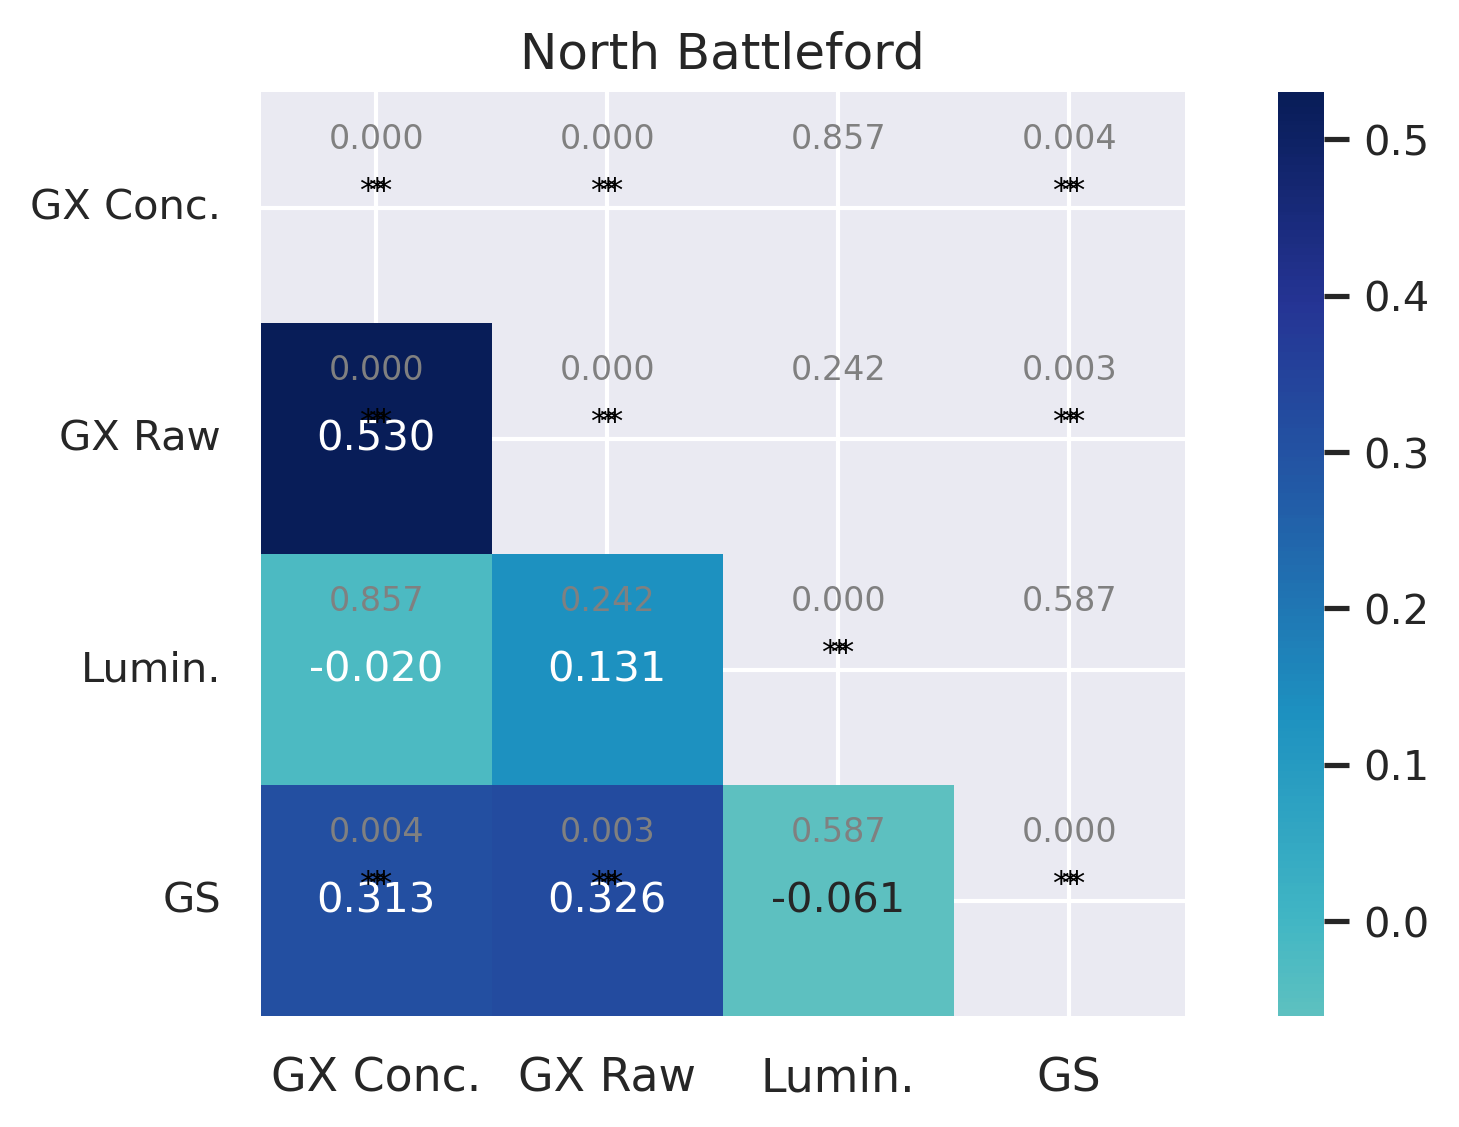

There are no NaN values in the dataframe.


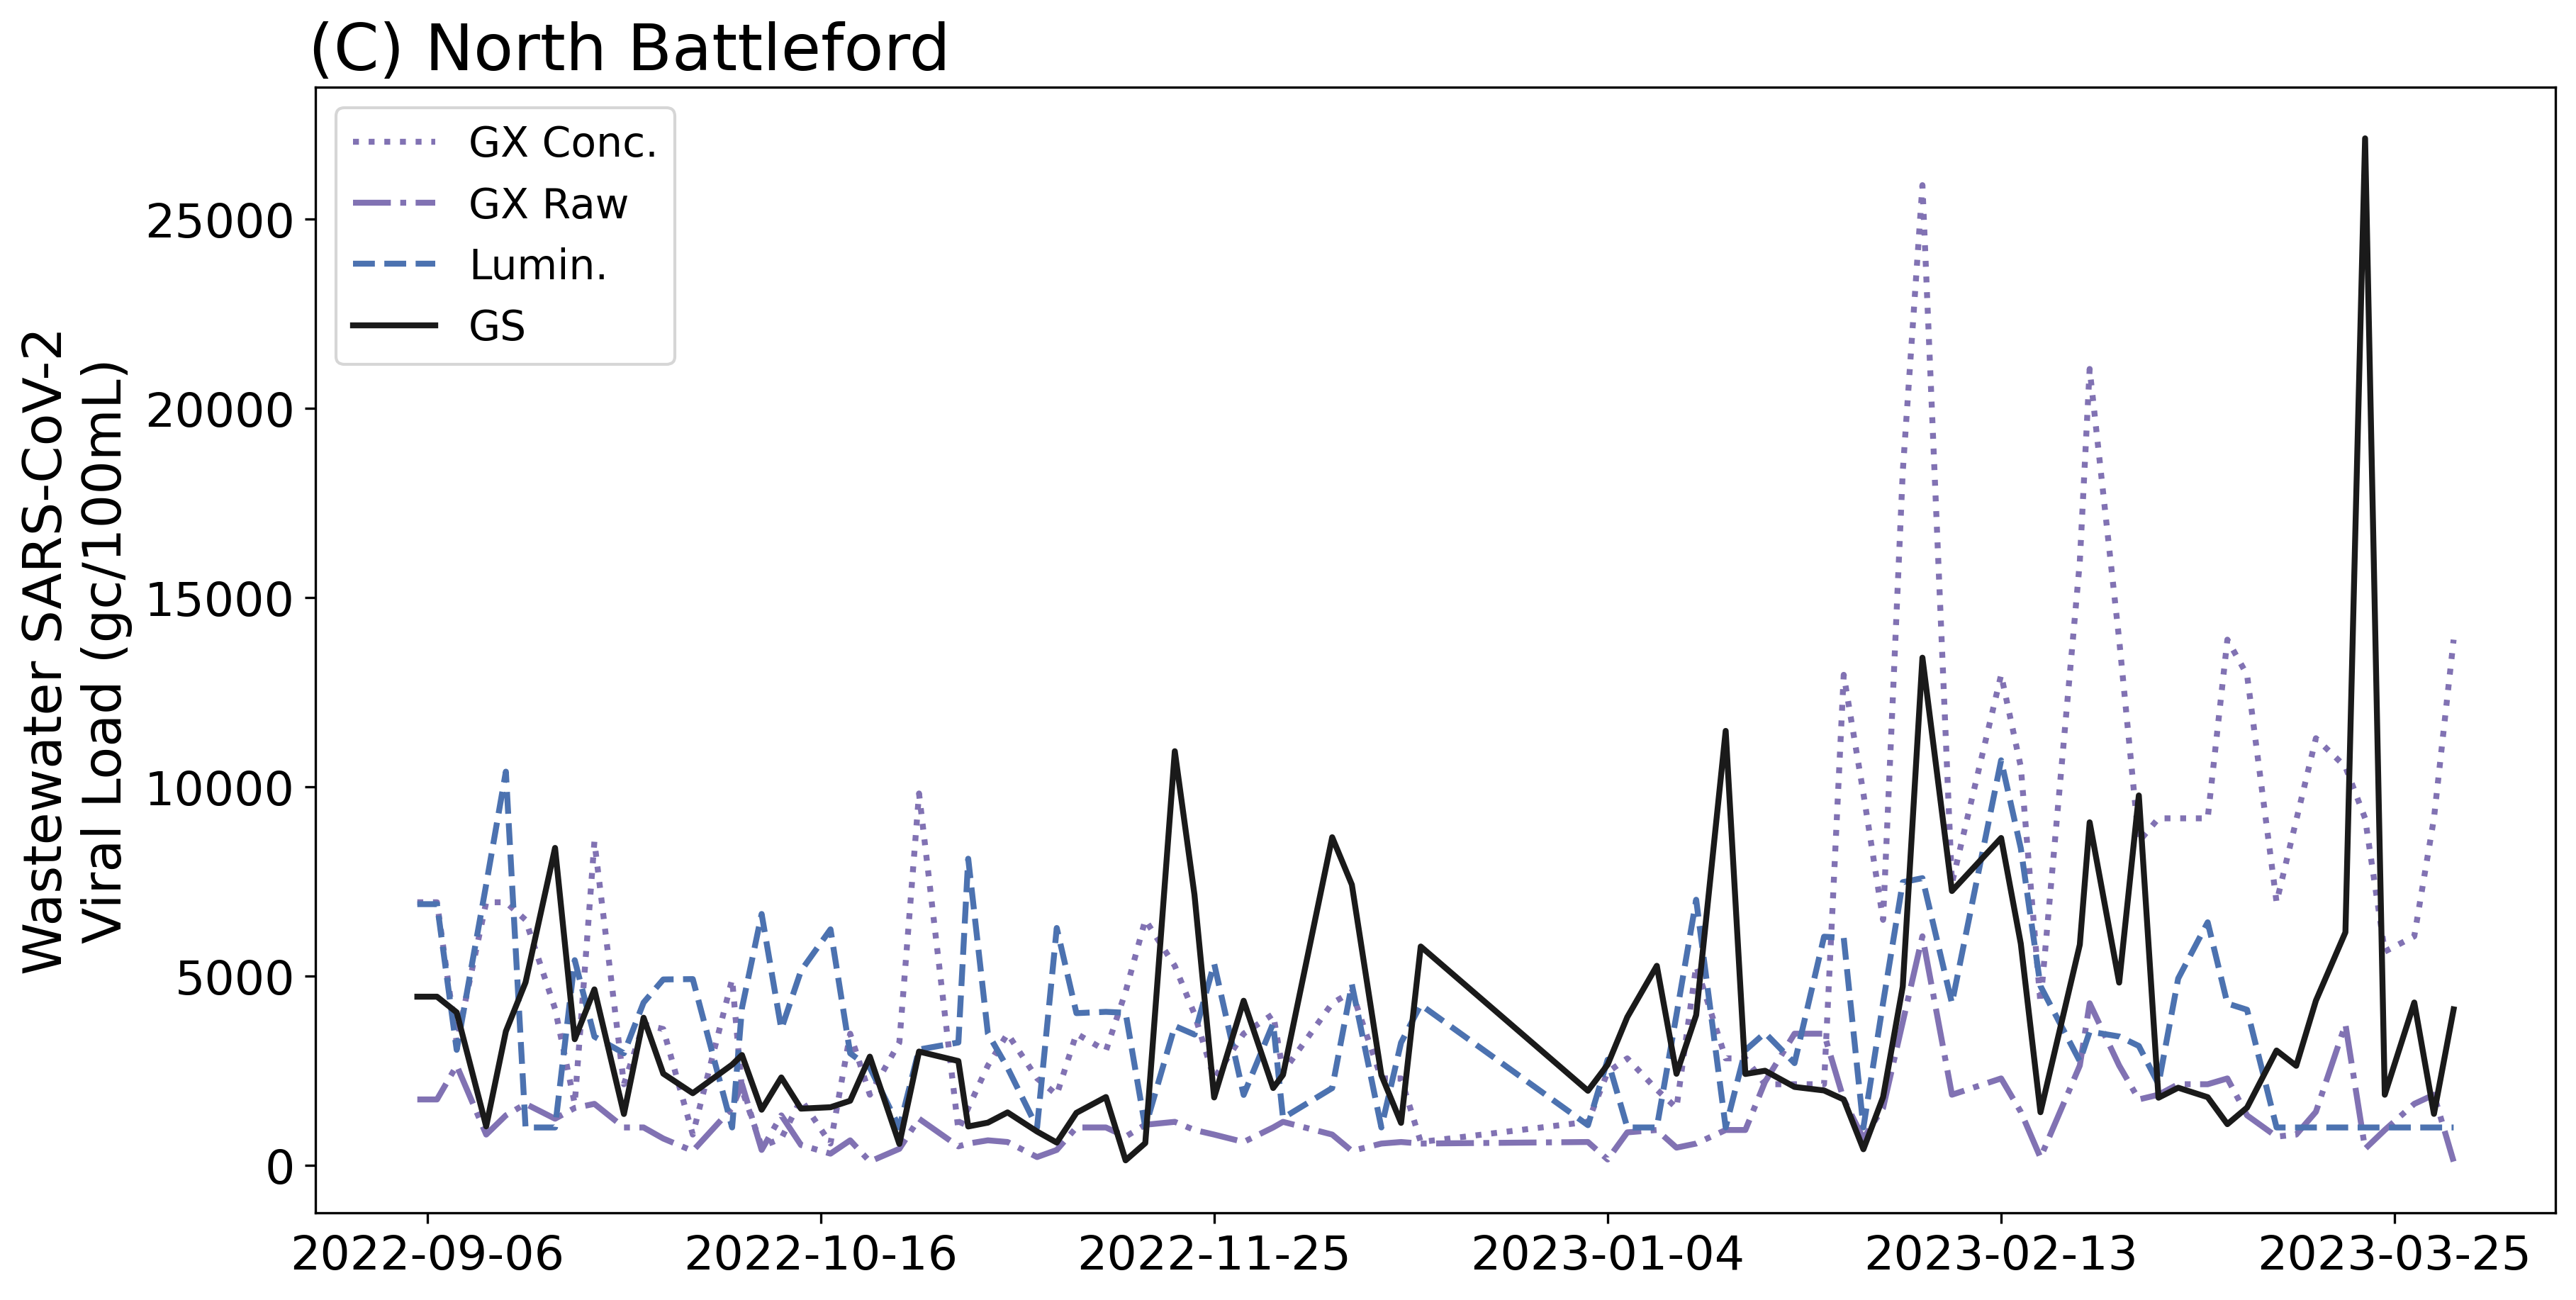

In [32]:
### NaN repalcing with Lumin. LOD = 1000 & rolling_mean for filling NaN with above and below values
nb_a['Lumin.'] = nb_a['Lumin.'].fillna(1000)

# Use rolling window to calculate the mean of the values above and below NaN values
rolling_mean = nb_a['GX Conc.'].rolling(window=3, min_periods=1, center=True).mean()
nb_a['GX Conc.']=nb_a['GX Conc.'].fillna(rolling_mean)

rolling_mean = nb_a['GX Raw'].rolling(window=3, min_periods=1, center=True).mean()
nb_a['GX Raw']=nb_a['GX Raw'].fillna(rolling_mean)

nb_a.dropna(subset=['GS'], inplace=True)


########  NORTH BATTLEFORD     Before PLUS KIT and AFTER Plus KIT     #######
nb_PLUS = nb_a[nb_a['Date'] > pd.Timestamp('2023-01-18 00:00:00')].copy() #After PLUS
nb_reg = nb_a[nb_a['Date'] < pd.Timestamp('2023-01-18 00:00:00')].copy() #Before PLUS


#####  Correlation Anlysis for before #####
cor_covid, pvalue_covid=spearmanr(nb_reg.drop(['Date'],axis=1), nan_policy='omit')
sk1= nb_reg.drop(['Date'],axis=1)

        # create dataframe with correlation & p-value matrixes
corr_df_reg = pd.DataFrame(cor_covid, columns=sk1.columns, index=sk1.columns)
pval_df_reg = pd.DataFrame(pvalue_covid, columns=sk1.columns, index=sk1.columns)

#####  Correlation Anlysis for AFTER #####
cor_covid, pvalue_covid=spearmanr(nb_PLUS.drop(['Date'],axis=1), nan_policy='omit')
sk1= nb_PLUS.drop(['Date'],axis=1)

        # create dataframe with correlation & p-value matrixes
corr_df_PLUS = pd.DataFrame(cor_covid, columns=sk1.columns, index=sk1.columns)
pval_df_PLUS = pd.DataFrame(pvalue_covid, columns=sk1.columns, index=sk1.columns)

#####  Correlation Anlysis for all #####
cor_covid, pvalue_covid=spearmanr(nb_a.drop(['Date'],axis=1), nan_policy='omit')
sk1= nb_a.drop(['Date'],axis=1)

        # create dataframe with correlation & p-value matrixes
corr_df_all = pd.DataFrame(cor_covid, columns=sk1.columns, index=sk1.columns)
pval_df_all = pd.DataFrame(pvalue_covid, columns=sk1.columns, index=sk1.columns)

### I saw that the PLUS and regular kit results were not statistically associated with the gold-standard 
### results. But I saw when I consider all data, there are significant correlations. 
### So, I used all data

################   H E A T M A P  ###################
sb.set(font_scale=1.0)  # adjust font size

# create heatmap of correlation matrix with p-values
fig, ax = plt.subplots(figsize=(8,4),dpi=300)
fig.patch.set_facecolor('white')  # set the figure background color to white

sb.heatmap(corr_df_all, cmap='YlGnBu', center=0, annot=True, fmt='.3f',
            square=True, cbar=True, ax=ax, annot_kws={'size':10},
            mask=np.triu(np.ones_like(corr_df_all, dtype=bool))) # mask to show only lower triangle
yticklabels = ['GX Conc.', 'GX Raw', 'Lumin.', 'GS']
ax.set_yticklabels(yticklabels, rotation=0, fontsize=10)

# add p-values to the heatmap annotations
for i in range(corr_df_all.shape[0]):
    for j in range(corr_df_all.shape[1]):
        if pval_df_all.iloc[i,j] < 0.1:  # add asterisks for p-values < 0.05
            ax.text(j+0.5, i+0.5, '*', ha='center', va='bottom', color='black', fontsize=8)
        if pval_df_all.iloc[i,j] < 0.05:  # add double asterisks for p-values < 0.01
            ax.text(j+0.5, i+0.5, '**', ha='center', va='bottom', color='black', fontsize=8)
        ax.text(j+0.5, i+0.2, f'{pval_df_all.iloc[i,j]:.3f}', ha='center', va='center', color='grey', fontsize=8)

# add colorbar legend
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.title('North Battleford')
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

plt.show()


#########################   DATA VISUALIZATOINs   ######################

### NaN repalcing with Lumin. LOD = 1000
nb_a['Lumin.'] = nb_a['Lumin.'].fillna(1000)
nb_a = nb_a.dropna()

# check if there are any NaN values in the dataframe
if nb_a.isna().any().any():
    print('There are NaN values in the dataframe.')
else:
    print('There are no NaN values in the dataframe.')
    

    # Convert the Date column to a numerical format
num_dates = np.array([dt.datetime.toordinal(date) for date in nb_a['Date']])

# Create a lowess smoother for Avg_L
lowess_smoother_R = sm.nonparametric.lowess(nb_a['GX Conc.'], num_dates, frac=0.00)
lowess_smoother_W = sm.nonparametric.lowess(nb_a['GX Raw'], num_dates, frac=0.00)
lowess_smoother_L = sm.nonparametric.lowess(nb_a['Lumin.'], num_dates, frac=0.00)
lowess_smoother_N2 = sm.nonparametric.lowess(nb_a['GS'], num_dates, frac=0.00)


# Plot the smoothed line on the same axes
fig, ax1 = plt.subplots(figsize=(12,6),dpi=300,constrained_layout=True)
fig.patch.set_facecolor('white')  # set the figure background color to white

ax1.plot(nb_a['Date'], lowess_smoother_R[:, 1], 'm:', linewidth=2)
ax1.plot(nb_a['Date'], lowess_smoother_W[:, 1], 'm-.', linewidth=2)
ax1.plot(nb_a['Date'], lowess_smoother_L[:, 1], 'b--', linewidth=2)
ax1.plot(nb_a['Date'], lowess_smoother_N2[:, 1], 'k-', linewidth=2)
ax1.set_ylabel('Wastewater SARS-CoV-2\nViral Load (gc/100mL)',fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(['GX Conc.','GX Raw','Lumin.','GS'],loc='best',fontsize=14)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=40))


# Vertical lines for SARS-CoV-2 sublinages

#vertical_line_date = dt.datetime.strptime('2022-11-13', '%Y-%m-%d')
#plt.axvline(x=vertical_line_date, color='red')


# Add text to the left panel
#plt.text(0.05, 0.9, 'BA5 and others', transform=ax1.transAxes, fontsize=19, va='top',color='red')
#plt.text(0.55, 0.9, 'R346T and others', transform=ax1.transAxes, fontsize=18, va='top',color='red')


#plt.tick_params(axis='x', labelrotation=90)

plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
title=plt.title('(C) North Battleford',fontsize=22)
title.set_position([0.14, 1.20])
plt.show()

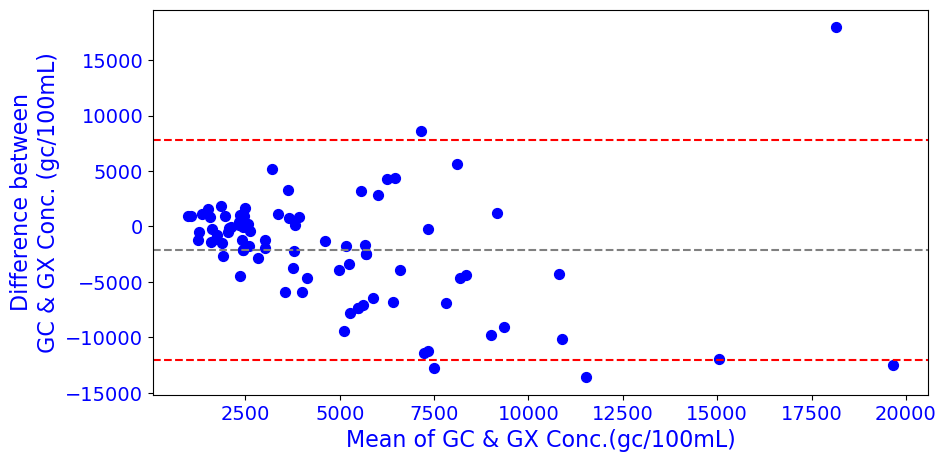

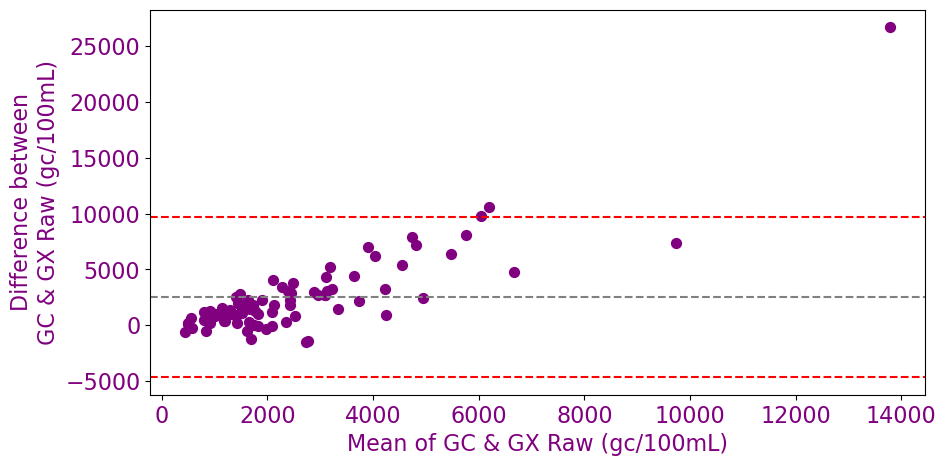

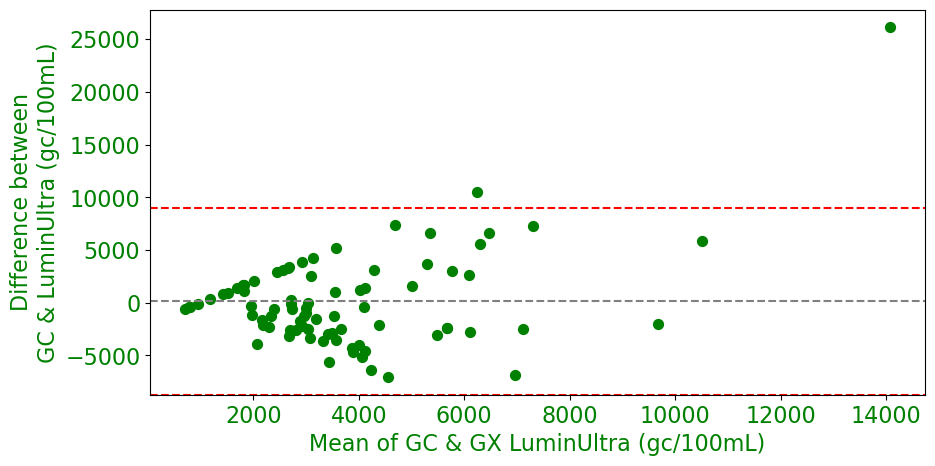

In [34]:
#####   Bland-Altman plot   ####
# Create first subplot
fig, ax1 = plt.subplots(figsize=(10, 5))

diff_nb=nb_a['GS']-nb_a['GX Conc.']
mean_nb=(nb_a['GS']+nb_a['GX Conc.'])/2

ax1.scatter(mean_nb,diff_nb, s=50, color='blue')


mean_diff_nb = np.mean(diff_nb)
sd_diff_nb = np.std(diff_nb, axis=0)
loa = mean_diff_nb + 1.96 * sd_diff_nb, mean_diff_nb - 1.96 * sd_diff_nb
ax1.axhline(y=mean_diff_nb, color='gray', linestyle='--')
ax1.axhline(y=loa[0], color='red', linestyle='--')
ax1.axhline(y=loa[1], color='red', linestyle='--')

ax1.set_ylabel('Difference between\n GC & GX Conc. (gc/100mL) ',fontsize=16,color="blue")
ax1.set_xlabel('Mean of GC & GX Conc.(gc/100mL)',fontsize=16,color="blue")

ax1.tick_params(axis='x', labelsize=14,labelcolor="blue")
ax1.tick_params(axis='y', labelsize=14,labelcolor="blue")

ax1.set_title('',fontsize=20)

#######################################################
fig, ax2 = plt.subplots(figsize=(10, 5))

diff_nb=nb_a['GS']-nb_a['GX Raw']
mean_nb=(nb_a['GS']+nb_a['GX Raw'])/2

ax2.scatter(mean_nb,diff_nb, s=50, color='purple')


mean_diff_nb = np.mean(diff_nb)
sd_diff_nb = np.std(diff_nb, axis=0)
loa = mean_diff_nb + 1.96 * sd_diff_nb, mean_diff_nb - 1.96 * sd_diff_nb
ax2.axhline(y=mean_diff_nb, color='gray', linestyle='--')
ax2.axhline(y=loa[0], color='red', linestyle='--')
ax2.axhline(y=loa[1], color='red', linestyle='--')

ax2.set_ylabel('Difference between\n GC & GX Raw (gc/100mL) ',fontsize=16, color="purple")
ax2.set_xlabel('Mean of GC & GX Raw (gc/100mL)',fontsize=16, color="purple")

ax2.tick_params(axis='x', labelsize=16, labelcolor="purple")
ax2.tick_params(axis='y', labelsize=16, labelcolor="purple")

ax2.set_title('',fontsize=20)


#############################################################
#######################################################
fig, ax3 = plt.subplots(figsize=(10, 5))

diff_nb=nb_a['GS']-nb_a['Lumin.']
mean_nb=(nb_a['GS']+nb_a['Lumin.'])/2

ax3.scatter(mean_nb,diff_nb, s=50, color='green')


mean_diff_nb = np.mean(diff_nb)
sd_diff_nb = np.std(diff_nb, axis=0)
loa = mean_diff_nb + 1.96 * sd_diff_nb, mean_diff_nb - 1.96 * sd_diff_nb
ax3.axhline(y=mean_diff_nb, color='gray', linestyle='--')
ax3.axhline(y=loa[0], color='red', linestyle='--')
ax3.axhline(y=loa[1], color='red', linestyle='--')

ax3.set_ylabel('Difference between\n GC & LuminUltra (gc/100mL) ',fontsize=16, color="green")
ax3.set_xlabel('Mean of GC & GX LuminUltra (gc/100mL)',fontsize=16, color="green")

ax3.tick_params(axis='x', labelsize=16, labelcolor="green")
ax3.tick_params(axis='y', labelsize=16, labelcolor="green")

#ax3.set_title('GS and Lumin.',fontsize=20)
